In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import torch.nn.functional as F
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
import joblib

In [2]:
df=pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# EDA

In [3]:
df.shape

(5960, 13)

In [4]:
df.isnull().sum()


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


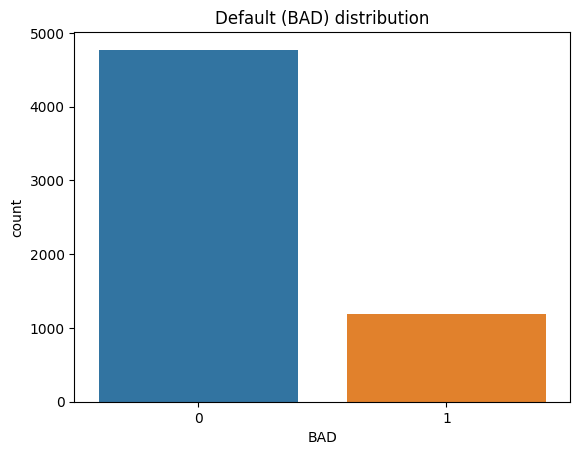

In [7]:
sns.countplot(x='BAD',data=df)
plt.title("Default (BAD) distribution")
plt.show()

Text(0.5, 1.0, 'HMEQ missing values')

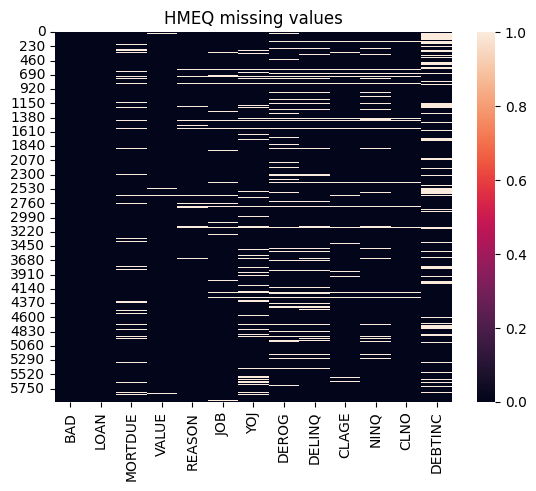

In [8]:
sns.heatmap(df.isnull())
plt.title("HMEQ missing values")

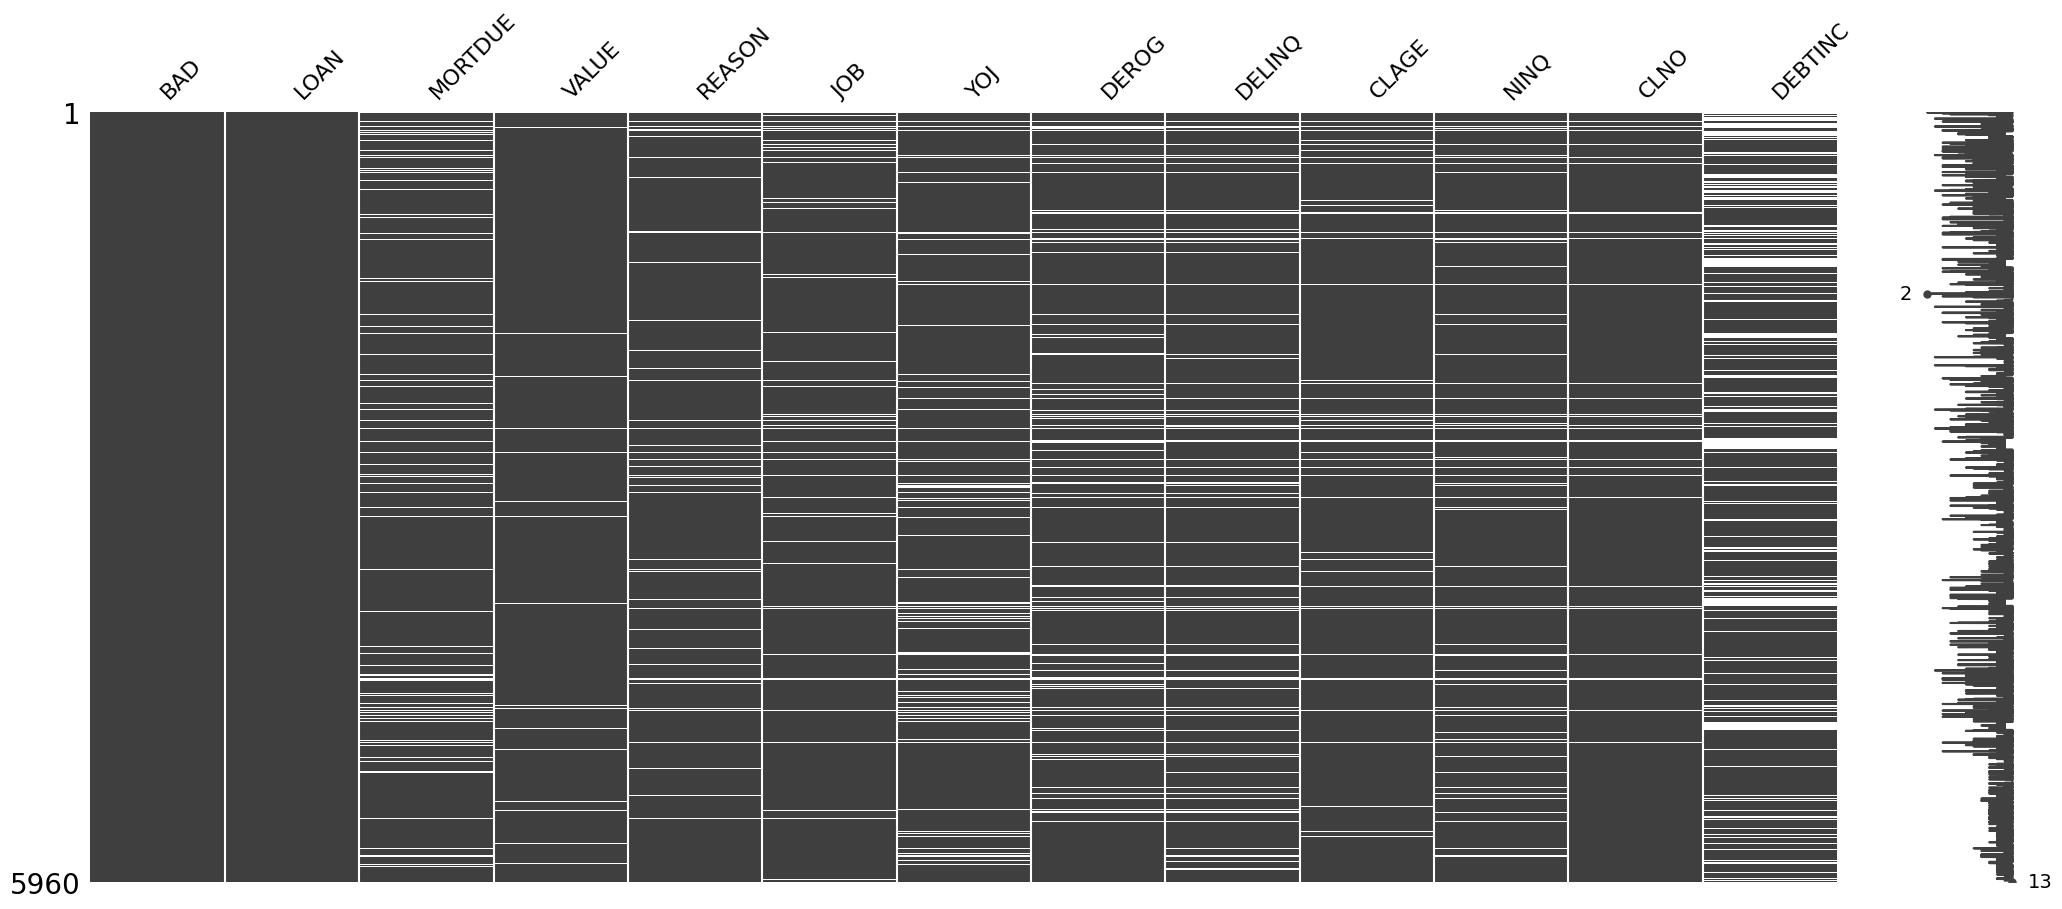

In [9]:
import missingno as msno
msno.matrix(df)
plt.show()



<Figure size 500x600 with 0 Axes>

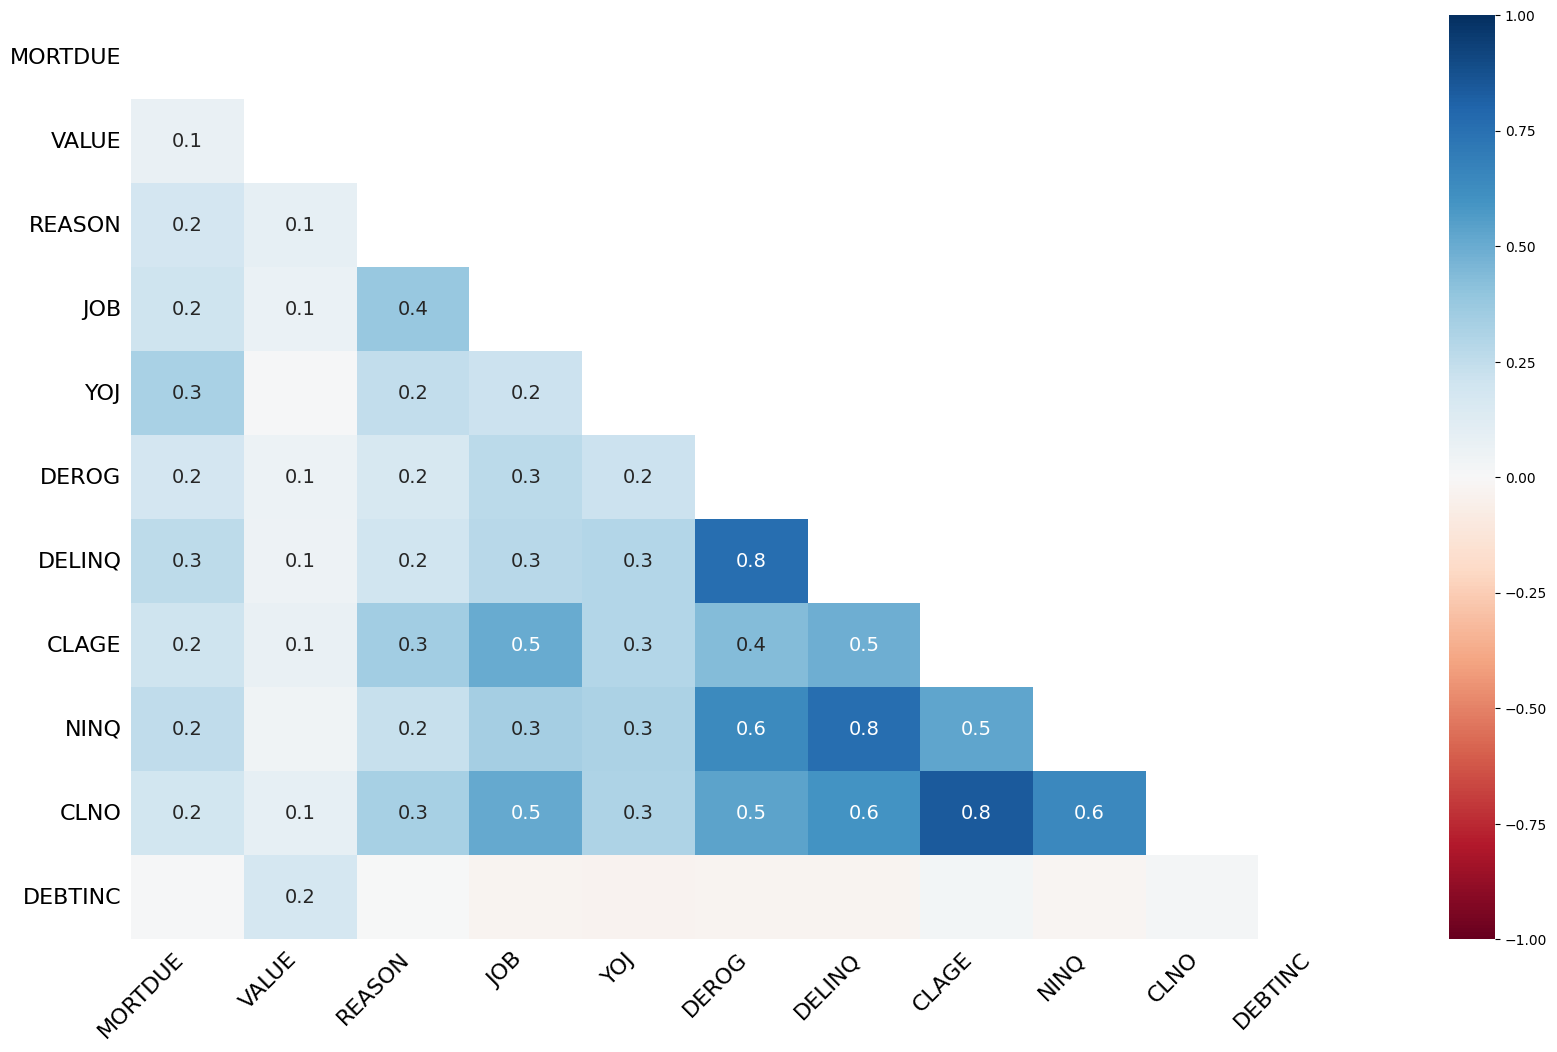

In [10]:
plt.figure(figsize=(5, 6))
msno.heatmap(df)
plt.show()

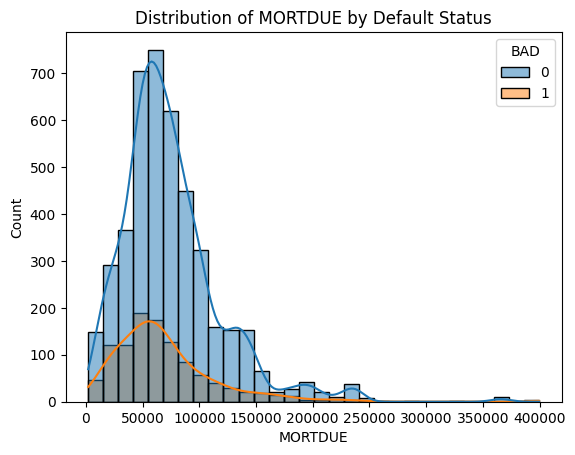

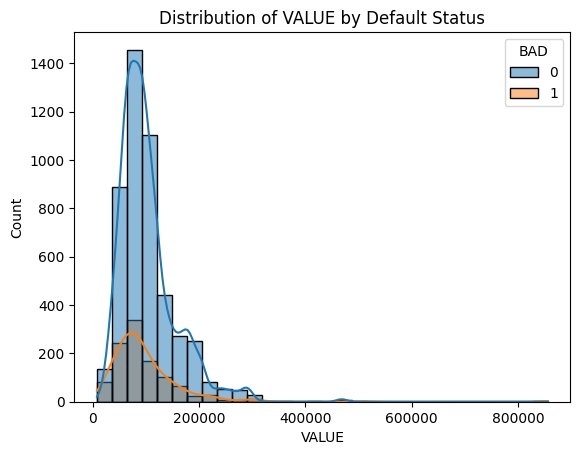

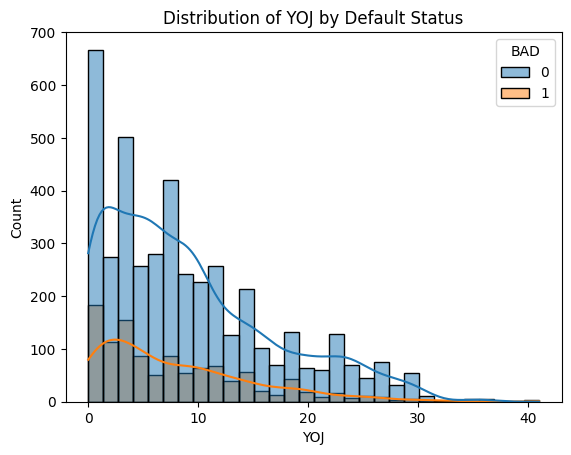

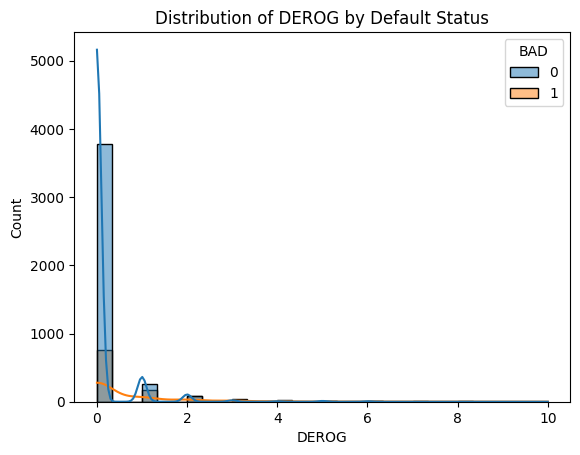

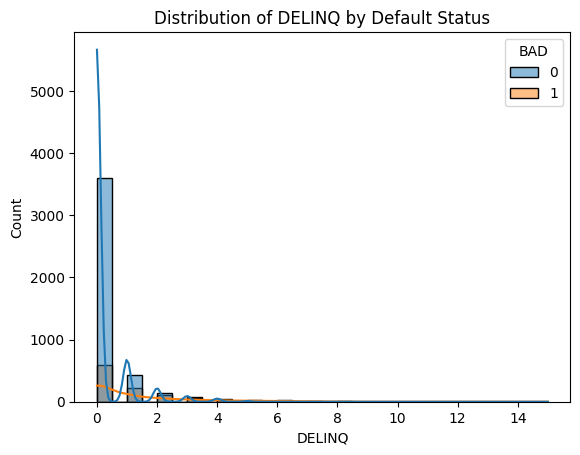

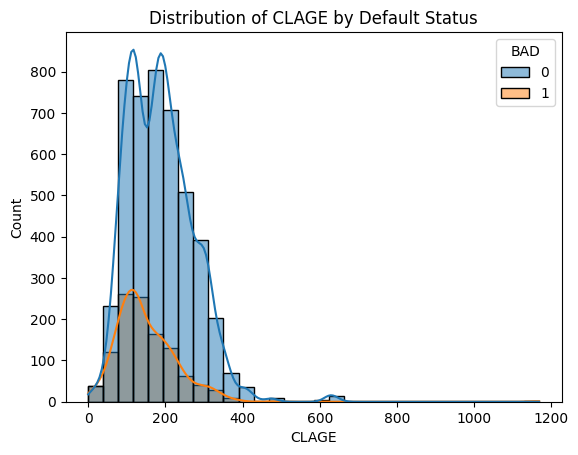

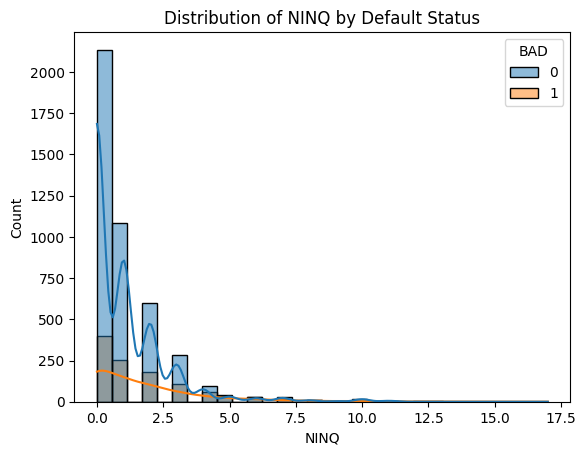

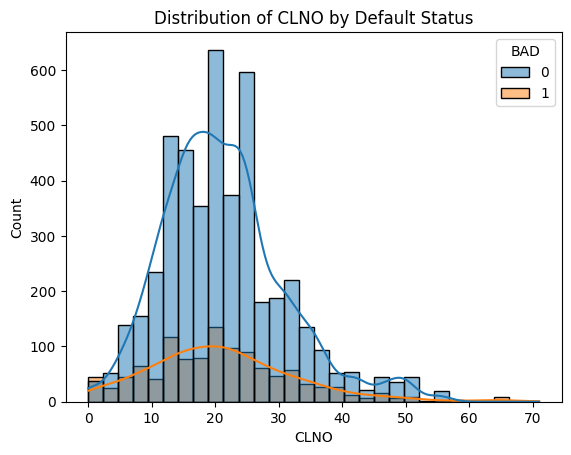

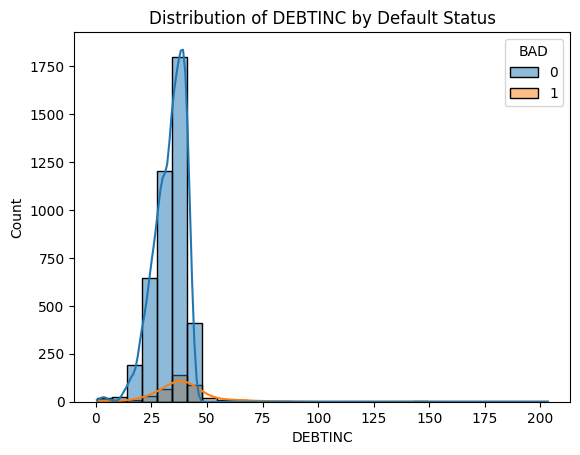

In [11]:
num_cols = ["MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"]

for col in num_cols:
    sns.histplot(data=df, x=col, hue="BAD", bins=30, kde=True)
    plt.title(f"Distribution of {col} by Default Status")
    plt.show()


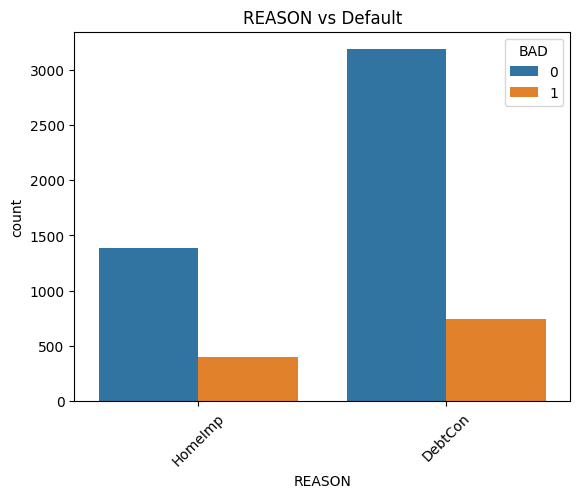

REASON
DebtCon    0.189664
HomeImp    0.222472
Name: BAD, dtype: float64


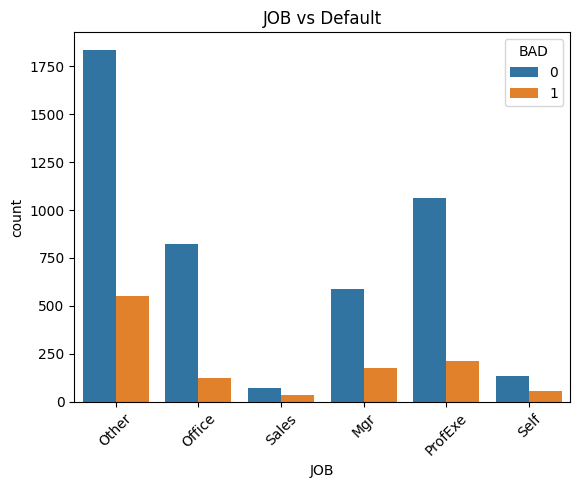

JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: BAD, dtype: float64


In [12]:
cat_cols = ["REASON","JOB"]

for col in cat_cols:
    sns.countplot(x=col, hue="BAD", data=df)
    plt.title(f"{col} vs Default")
    plt.xticks(rotation=45)
    plt.show()

    print(df.groupby(col)['BAD'].mean())


In [13]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

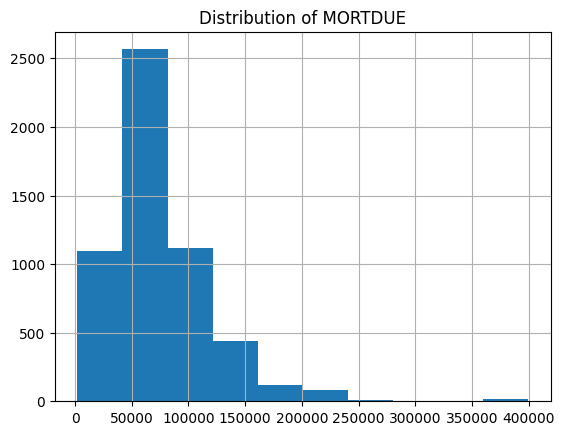

In [14]:
df['MORTDUE'].hist()

plt.title("Distribution of MORTDUE")
plt.show()

In [15]:
print(df['MORTDUE'].describe())

count      5442.000000
mean      73760.817200
std       44457.609458
min        2063.000000
25%       46276.000000
50%       65019.000000
75%       91488.000000
max      399550.000000
Name: MORTDUE, dtype: float64


In [16]:
df['MORTDUE']=df['MORTDUE'].fillna(df['MORTDUE'].median())

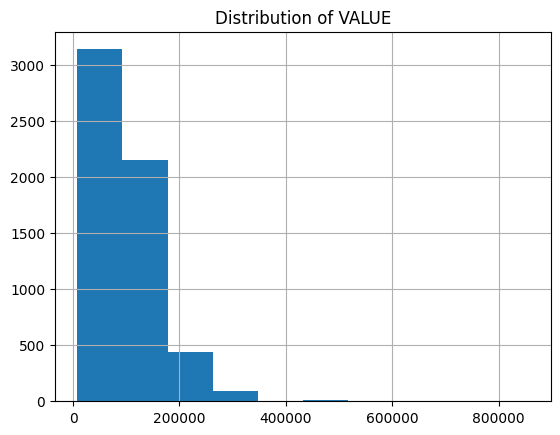

In [17]:
df['VALUE'].hist()

plt.title("Distribution of VALUE")
plt.show()

In [18]:
df['VALUE'].describe()

count      5848.000000
mean     101776.048741
std       57385.775334
min        8000.000000
25%       66075.500000
50%       89235.500000
75%      119824.250000
max      855909.000000
Name: VALUE, dtype: float64

In [19]:
df['VALUE']=df['VALUE'].fillna(df['VALUE'].median())

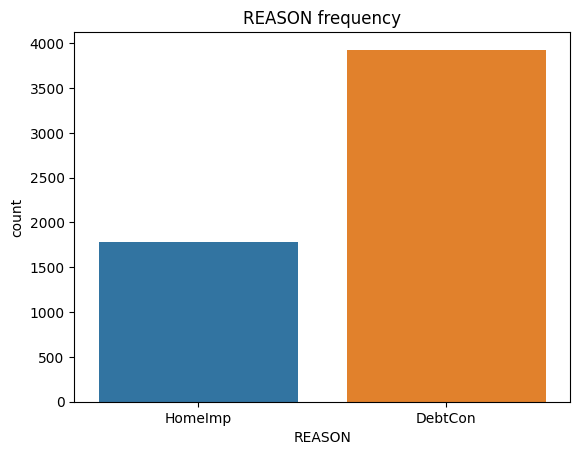

In [20]:
sns.countplot(x='REASON',data=df)
plt.title("REASON frequency")
plt.show()

In [21]:
df['REASON']=df['REASON'].fillna('Unknown')

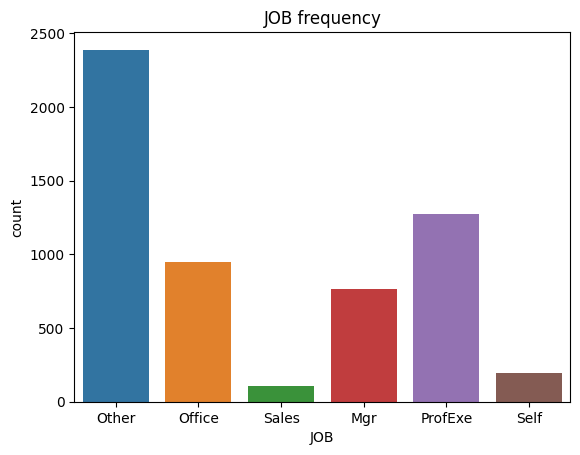

In [22]:
sns.countplot(x='JOB',data=df)
plt.title("JOB frequency")
plt.show()

In [23]:
df['JOB']=df['JOB'].fillna(df['JOB'].mode()[0])

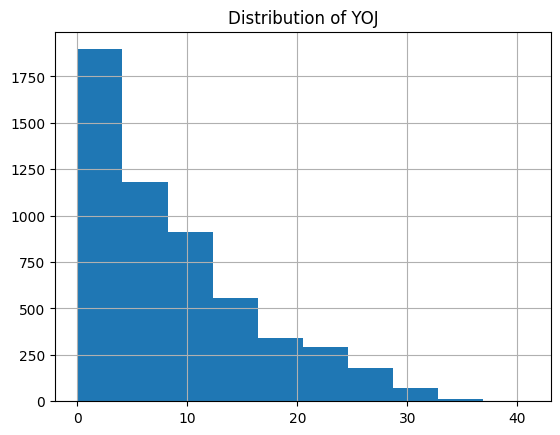

In [24]:
df['YOJ'].hist()
plt.title("Distribution of YOJ")
plt.show()

In [25]:
df['YOJ'].describe()

count    5445.000000
mean        8.922268
std         7.573982
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        41.000000
Name: YOJ, dtype: float64

In [26]:
df['YOJ']=df['YOJ'].fillna(df['YOJ'].median())

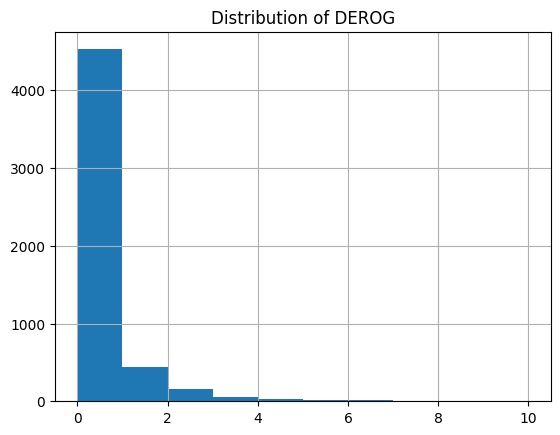

In [27]:
df['DEROG'].hist()
plt.title("Distribution of DEROG")
plt.show()

In [28]:
df['DEROG'].describe()

count    5252.000000
mean        0.254570
std         0.846047
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: DEROG, dtype: float64

In [29]:
df['DEROG']=df['DEROG'].fillna(df['DEROG'].median())

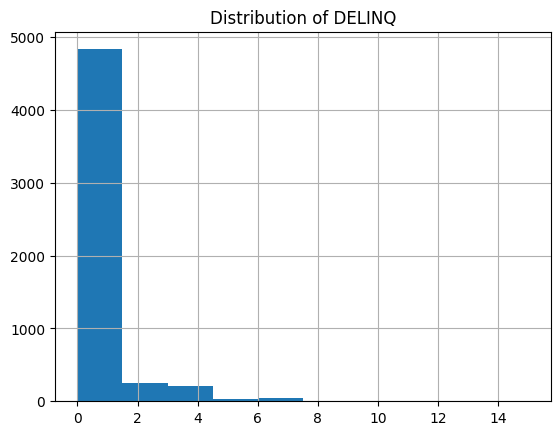

In [30]:
df['DELINQ'].hist()
plt.title("Distribution of DELINQ")
plt.show()

In [31]:
df['DELINQ'].describe()

count    5380.000000
mean        0.449442
std         1.127266
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: DELINQ, dtype: float64

In [32]:
df['DELINQ']=df['DELINQ'].fillna(df['DELINQ'].median())

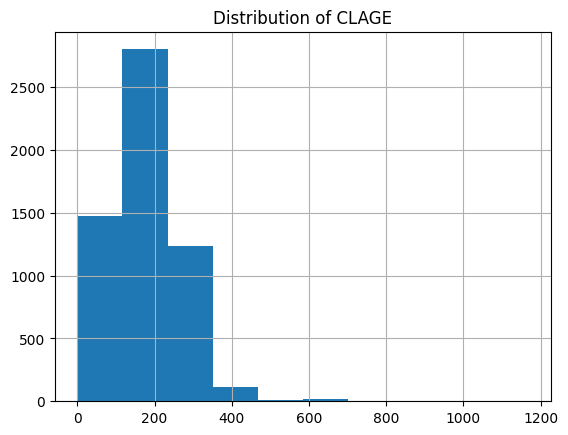

In [33]:
df['CLAGE'].hist()
plt.title("Distribution of CLAGE")
plt.show()

In [34]:
df['CLAGE'].describe()

count    5652.000000
mean      179.766275
std        85.810092
min         0.000000
25%       115.116702
50%       173.466667
75%       231.562278
max      1168.233561
Name: CLAGE, dtype: float64

In [35]:
df['CLAGE']=df['CLAGE'].fillna(df['CLAGE'].median())

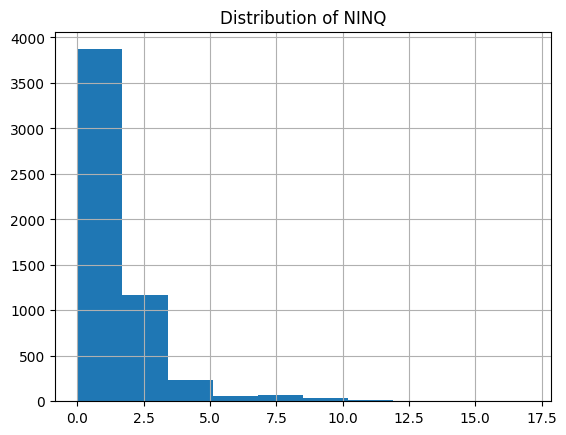

In [36]:
df['NINQ'].hist()
plt.title("Distribution of NINQ")
plt.show()

In [37]:
df['NINQ'].describe()

count    5450.000000
mean        1.186055
std         1.728675
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: NINQ, dtype: float64

In [38]:
df['NINQ']=df['NINQ'].fillna(df['NINQ'].median())

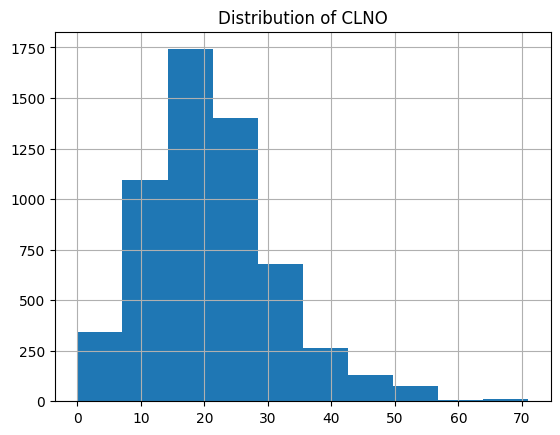

In [39]:
df['CLNO'].hist()
plt.title("Distribution of CLNO")
plt.show()

In [40]:
df['CLNO'].describe()

count    5738.000000
mean       21.296096
std        10.138933
min         0.000000
25%        15.000000
50%        20.000000
75%        26.000000
max        71.000000
Name: CLNO, dtype: float64

In [41]:
df['CLNO']=df['CLNO'].fillna(df['CLNO'].median())

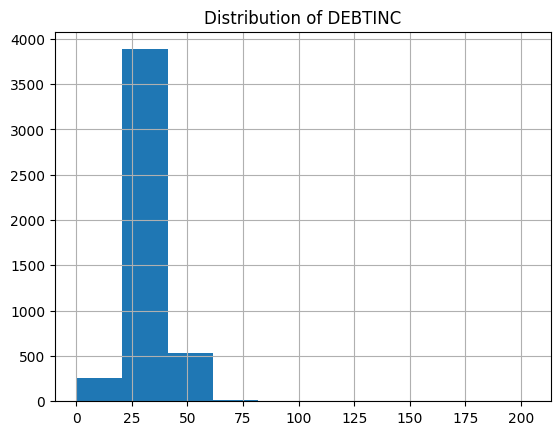

In [42]:
df['DEBTINC'].hist()
plt.title("Distribution of DEBTINC")
plt.show()

In [43]:
df['DEBTINC'].describe()

count    4693.000000
mean       33.779915
std         8.601746
min         0.524499
25%        29.140031
50%        34.818262
75%        39.003141
max       203.312149
Name: DEBTINC, dtype: float64

In [44]:
df['DEBTINC']=df['DEBTINC'].fillna(df['DEBTINC'].median())

In [45]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Modeling


In [46]:
cat_col=['REASON','JOB']

In [47]:
df=pd.get_dummies(df,cat_col,drop_first=True)

In [48]:
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,REASON_Unknown,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,True,False,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,True,False,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,True,False,False,True,False,False,False
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,False,True,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,False,False,False,True,False,False,False
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,False,False,False,True,False,False,False
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,False,False,False,True,False,False,False
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,False,False,False,True,False,False,False


In [49]:
results={}

In [50]:
def evaluate_and_store(model,X_train,y_train,X_test,y_test,name="Model"):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)[:,1]
    results={"Model":name,
             "Accuracy":accuracy_score(y_test,y_pred),
             "Precision":precision_score(y_test,y_pred),
             "Recall":recall_score(y_test,y_pred),
             "F1_macro":f1_score(y_test,y_pred),
             "ROC_AUC":roc_auc_score(y_test,y_proba)}
    return results

In [51]:
results_bs={}
results_rus={}
results_smote={}
results_adasyn={}
results_smoteenn={}
results_smotetomek={}

# Before sampling

In [52]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [54]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_bs["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")
print(lr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       954
           1       0.71      0.34      0.46       238

    accuracy                           0.84      1192
   macro avg       0.78      0.65      0.69      1192
weighted avg       0.83      0.84      0.82      1192



In [56]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_bs["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="knn")

print(knn)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       954
           1       0.99      0.43      0.60       238

    accuracy                           0.89      1192
   macro avg       0.93      0.71      0.77      1192
weighted avg       0.90      0.89      0.87      1192



In [57]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_bs["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")

print(svm)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       954
           1       0.98      0.45      0.62       238

    accuracy                           0.89      1192
   macro avg       0.93      0.72      0.78      1192
weighted avg       0.90      0.89      0.87      1192



In [58]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_bs["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")

print(rf)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       954
           1       0.87      0.63      0.73       238

    accuracy                           0.91      1192
   macro avg       0.89      0.80      0.84      1192
weighted avg       0.91      0.91      0.90      1192



In [59]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_bs["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")

print(xgb)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       954
           1       0.85      0.66      0.75       238

    accuracy                           0.91      1192
   macro avg       0.89      0.82      0.85      1192
weighted avg       0.91      0.91      0.91      1192



In [60]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_bs["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")

print(gb)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       954
           1       0.82      0.62      0.71       238

    accuracy                           0.90      1192
   macro avg       0.87      0.79      0.82      1192
weighted avg       0.89      0.90      0.89      1192



In [61]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_bs["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")

print(dt)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       954
           1       0.68      0.64      0.66       238

    accuracy                           0.87      1192
   macro avg       0.79      0.78      0.79      1192
weighted avg       0.86      0.87      0.87      1192



In [62]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_bs["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive Bayes")

print(nb)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       954
           1       0.50      0.42      0.45       238

    accuracy                           0.80      1192
   macro avg       0.68      0.66      0.67      1192
weighted avg       0.79      0.80      0.79      1192



In [63]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)

print(ann_res)

Epoch 1/30, Loss: 76.9799, Val Acc: 0.8205, Val AUC: 0.7377
Epoch 2/30, Loss: 61.0782, Val Acc: 0.8389, Val AUC: 0.7719
Epoch 3/30, Loss: 58.6225, Val Acc: 0.8473, Val AUC: 0.7796
Epoch 4/30, Loss: 57.8747, Val Acc: 0.8482, Val AUC: 0.7877
Epoch 5/30, Loss: 56.1761, Val Acc: 0.8515, Val AUC: 0.7891
Epoch 6/30, Loss: 55.1602, Val Acc: 0.8490, Val AUC: 0.7961
Epoch 7/30, Loss: 55.0384, Val Acc: 0.8532, Val AUC: 0.7984
Epoch 8/30, Loss: 54.4170, Val Acc: 0.8557, Val AUC: 0.8044
Epoch 9/30, Loss: 54.0790, Val Acc: 0.8591, Val AUC: 0.8067
Epoch 10/30, Loss: 53.4280, Val Acc: 0.8582, Val AUC: 0.8089
Epoch 11/30, Loss: 53.0353, Val Acc: 0.8549, Val AUC: 0.8070
Epoch 12/30, Loss: 53.1973, Val Acc: 0.8607, Val AUC: 0.8074
Epoch 13/30, Loss: 52.0099, Val Acc: 0.8591, Val AUC: 0.8138
Epoch 14/30, Loss: 51.9081, Val Acc: 0.8599, Val AUC: 0.8130
Epoch 15/30, Loss: 51.0943, Val Acc: 0.8582, Val AUC: 0.8091
Epoch 16/30, Loss: 51.3990, Val Acc: 0.8624, Val AUC: 0.8180
Epoch 17/30, Loss: 50.1890, Val A

In [64]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)
print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")



Epoch 1/30 | Loss: 19.1440 | Val Acc: 0.8314 | Val AUC: 0.7560
Epoch 2/30 | Loss: 16.1891 | Val Acc: 0.8339 | Val AUC: 0.7703
Epoch 3/30 | Loss: 15.4836 | Val Acc: 0.8356 | Val AUC: 0.7839
Epoch 4/30 | Loss: 15.1050 | Val Acc: 0.8440 | Val AUC: 0.7969
Epoch 5/30 | Loss: 15.1275 | Val Acc: 0.8431 | Val AUC: 0.7984
Epoch 6/30 | Loss: 14.6338 | Val Acc: 0.8465 | Val AUC: 0.8043
Epoch 7/30 | Loss: 14.4556 | Val Acc: 0.8498 | Val AUC: 0.8021
Epoch 8/30 | Loss: 14.2127 | Val Acc: 0.8523 | Val AUC: 0.8158
Epoch 9/30 | Loss: 13.9139 | Val Acc: 0.8574 | Val AUC: 0.8144
Epoch 10/30 | Loss: 14.1109 | Val Acc: 0.8599 | Val AUC: 0.8191
Epoch 11/30 | Loss: 13.7111 | Val Acc: 0.8599 | Val AUC: 0.8085
Epoch 12/30 | Loss: 13.7814 | Val Acc: 0.8641 | Val AUC: 0.8301
Epoch 13/30 | Loss: 13.5918 | Val Acc: 0.8683 | Val AUC: 0.8290
Epoch 14/30 | Loss: 13.2087 | Val Acc: 0.8683 | Val AUC: 0.8344
Epoch 15/30 | Loss: 13.3278 | Val Acc: 0.8641 | Val AUC: 0.8337
Epoch 16/30 | Loss: 13.2260 | Val Acc: 0.8674 | V

In [65]:
results['Before sampling']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# Under sampling

In [66]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [68]:
rus=RandomUnderSampler(random_state=42)
X_train,y_train=rus.fit_resample(X_train,y_train)

In [69]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [70]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_rus["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")

print(lr)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       954
           1       0.42      0.61      0.50       238

    accuracy                           0.75      1192
   macro avg       0.65      0.70      0.67      1192
weighted avg       0.80      0.75      0.77      1192



In [71]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_rus["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="KNN")
print(knn)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       954
           1       0.53      0.68      0.59       238

    accuracy                           0.81      1192
   macro avg       0.72      0.76      0.74      1192
weighted avg       0.84      0.81      0.82      1192



In [72]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_rus["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")
print(svm)

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       954
           1       0.45      0.71      0.55       238

    accuracy                           0.77      1192
   macro avg       0.68      0.75      0.70      1192
weighted avg       0.82      0.77      0.79      1192



In [73]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_rus["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")
print(rf)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       954
           1       0.64      0.84      0.73       238

    accuracy                           0.87      1192
   macro avg       0.80      0.86      0.82      1192
weighted avg       0.89      0.87      0.88      1192



In [74]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_rus["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")
print(xgb)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       954
           1       0.66      0.81      0.73       238

    accuracy                           0.88      1192
   macro avg       0.80      0.85      0.82      1192
weighted avg       0.89      0.88      0.88      1192



In [75]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_rus["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")
print(gb)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       954
           1       0.64      0.81      0.71       238

    accuracy                           0.87      1192
   macro avg       0.79      0.85      0.81      1192
weighted avg       0.89      0.87      0.87      1192



In [76]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_rus["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")
print(dt)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       954
           1       0.49      0.74      0.59       238

    accuracy                           0.80      1192
   macro avg       0.71      0.77      0.73      1192
weighted avg       0.84      0.80      0.81      1192



In [77]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_rus["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive Bayes")
print(nb)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       954
           1       0.47      0.45      0.46       238

    accuracy                           0.79      1192
   macro avg       0.67      0.66      0.66      1192
weighted avg       0.79      0.79      0.79      1192



In [78]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)
print(ann_res)

Epoch 1/30, Loss: 40.2239, Val Acc: 0.6552, Val AUC: 0.7441
Epoch 2/30, Loss: 35.3351, Val Acc: 0.7223, Val AUC: 0.7609
Epoch 3/30, Loss: 32.2699, Val Acc: 0.7441, Val AUC: 0.7745
Epoch 4/30, Loss: 31.2279, Val Acc: 0.7315, Val AUC: 0.7876
Epoch 5/30, Loss: 31.0082, Val Acc: 0.7332, Val AUC: 0.7821
Epoch 6/30, Loss: 31.3056, Val Acc: 0.7441, Val AUC: 0.7913
Epoch 7/30, Loss: 30.3325, Val Acc: 0.7592, Val AUC: 0.7960
Epoch 8/30, Loss: 29.8525, Val Acc: 0.7534, Val AUC: 0.7893
Epoch 9/30, Loss: 29.8007, Val Acc: 0.7408, Val AUC: 0.7969
Epoch 10/30, Loss: 29.3204, Val Acc: 0.7391, Val AUC: 0.7982
Epoch 11/30, Loss: 29.7697, Val Acc: 0.7550, Val AUC: 0.7967
Epoch 12/30, Loss: 29.4092, Val Acc: 0.7643, Val AUC: 0.7982
Epoch 13/30, Loss: 29.0630, Val Acc: 0.7576, Val AUC: 0.8031
Epoch 14/30, Loss: 29.3085, Val Acc: 0.7601, Val AUC: 0.8067
Epoch 15/30, Loss: 29.1154, Val Acc: 0.7525, Val AUC: 0.8051
Epoch 16/30, Loss: 28.2516, Val Acc: 0.7450, Val AUC: 0.8059
Epoch 17/30, Loss: 28.6782, Val A

In [79]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)
print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")


Epoch 1/30 | Loss: 9.8463 | Val Acc: 0.7391 | Val AUC: 0.7411
Epoch 2/30 | Loss: 8.8954 | Val Acc: 0.7190 | Val AUC: 0.7699
Epoch 3/30 | Loss: 8.3173 | Val Acc: 0.7534 | Val AUC: 0.7830
Epoch 4/30 | Loss: 8.1328 | Val Acc: 0.7601 | Val AUC: 0.7853
Epoch 5/30 | Loss: 7.9041 | Val Acc: 0.7374 | Val AUC: 0.7977
Epoch 6/30 | Loss: 7.9128 | Val Acc: 0.7450 | Val AUC: 0.7976
Epoch 7/30 | Loss: 7.8079 | Val Acc: 0.7676 | Val AUC: 0.8014
Epoch 8/30 | Loss: 7.5926 | Val Acc: 0.7399 | Val AUC: 0.8022
Epoch 9/30 | Loss: 7.5473 | Val Acc: 0.7483 | Val AUC: 0.8028
Epoch 10/30 | Loss: 7.5089 | Val Acc: 0.7760 | Val AUC: 0.8071
Epoch 11/30 | Loss: 7.5336 | Val Acc: 0.7592 | Val AUC: 0.8076
Epoch 12/30 | Loss: 7.4675 | Val Acc: 0.7492 | Val AUC: 0.8067
Epoch 13/30 | Loss: 7.1442 | Val Acc: 0.7273 | Val AUC: 0.8115
Epoch 14/30 | Loss: 7.3141 | Val Acc: 0.7433 | Val AUC: 0.8095
Epoch 15/30 | Loss: 7.2639 | Val Acc: 0.7525 | Val AUC: 0.8112
Epoch 16/30 | Loss: 7.1552 | Val Acc: 0.7408 | Val AUC: 0.8148
E

In [80]:
results['Under sampling']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# SMOTE

In [81]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [83]:
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

In [84]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_smote["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")
print(lr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       954
           1       0.46      0.51      0.48       238

    accuracy                           0.78      1192
   macro avg       0.67      0.68      0.67      1192
weighted avg       0.79      0.78      0.79      1192



In [86]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_smote["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="KNN")
print(knn)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       954
           1       0.99      0.69      0.81       238

    accuracy                           0.94      1192
   macro avg       0.96      0.84      0.89      1192
weighted avg       0.94      0.94      0.93      1192



In [87]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_smote["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")
print(svm)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       954
           1       0.66      0.65      0.66       238

    accuracy                           0.86      1192
   macro avg       0.79      0.78      0.79      1192
weighted avg       0.86      0.86      0.86      1192



In [88]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_smote["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")
print(rf)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       954
           1       0.82      0.70      0.76       238

    accuracy                           0.91      1192
   macro avg       0.87      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



In [89]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_smote["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")
print(xgb)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       954
           1       0.90      0.72      0.80       238

    accuracy                           0.93      1192
   macro avg       0.91      0.85      0.88      1192
weighted avg       0.93      0.93      0.92      1192



In [90]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_smote["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")
print(gb)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       954
           1       0.70      0.68      0.69       238

    accuracy                           0.88      1192
   macro avg       0.81      0.80      0.81      1192
weighted avg       0.88      0.88      0.88      1192



In [91]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_smote["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")
print(dt)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       954
           1       0.66      0.67      0.66       238

    accuracy                           0.86      1192
   macro avg       0.79      0.79      0.79      1192
weighted avg       0.86      0.86      0.86      1192



In [92]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_smote["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive bayes")
print(nb)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       954
           1       0.45      0.43      0.44       238

    accuracy                           0.78      1192
   macro avg       0.65      0.65      0.65      1192
weighted avg       0.78      0.78      0.78      1192



In [93]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)
print(ann_res)

Epoch 1/30, Loss: 125.5915, Val Acc: 0.7819, Val AUC: 0.7694
Epoch 2/30, Loss: 103.1533, Val Acc: 0.8012, Val AUC: 0.7817
Epoch 3/30, Loss: 98.0239, Val Acc: 0.8188, Val AUC: 0.7846
Epoch 4/30, Loss: 94.7958, Val Acc: 0.8171, Val AUC: 0.7868
Epoch 5/30, Loss: 92.4464, Val Acc: 0.8104, Val AUC: 0.7947
Epoch 6/30, Loss: 90.4849, Val Acc: 0.8087, Val AUC: 0.7972
Epoch 7/30, Loss: 89.0467, Val Acc: 0.8146, Val AUC: 0.8015
Epoch 8/30, Loss: 86.7564, Val Acc: 0.8180, Val AUC: 0.8101
Epoch 9/30, Loss: 85.1600, Val Acc: 0.8003, Val AUC: 0.8097
Epoch 10/30, Loss: 84.1567, Val Acc: 0.8062, Val AUC: 0.8063
Epoch 11/30, Loss: 83.8023, Val Acc: 0.8280, Val AUC: 0.8071
Epoch 12/30, Loss: 83.2159, Val Acc: 0.8247, Val AUC: 0.8236
Epoch 13/30, Loss: 80.6477, Val Acc: 0.8297, Val AUC: 0.8243
Epoch 14/30, Loss: 79.5371, Val Acc: 0.8305, Val AUC: 0.8175
Epoch 15/30, Loss: 78.1025, Val Acc: 0.8339, Val AUC: 0.8284
Epoch 16/30, Loss: 79.0485, Val Acc: 0.8372, Val AUC: 0.8331
Epoch 17/30, Loss: 77.5931, Val

In [94]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)
print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")


Epoch 1/30 | Loss: 32.2839 | Val Acc: 0.7903 | Val AUC: 0.7734
Epoch 2/30 | Loss: 26.5991 | Val Acc: 0.8146 | Val AUC: 0.7936
Epoch 3/30 | Loss: 25.2152 | Val Acc: 0.8146 | Val AUC: 0.8035
Epoch 4/30 | Loss: 24.5003 | Val Acc: 0.8154 | Val AUC: 0.8025
Epoch 5/30 | Loss: 23.9745 | Val Acc: 0.8079 | Val AUC: 0.8044
Epoch 6/30 | Loss: 23.2634 | Val Acc: 0.8104 | Val AUC: 0.8140
Epoch 7/30 | Loss: 22.6475 | Val Acc: 0.8138 | Val AUC: 0.8156
Epoch 8/30 | Loss: 22.2210 | Val Acc: 0.8171 | Val AUC: 0.8148
Epoch 9/30 | Loss: 22.3014 | Val Acc: 0.8112 | Val AUC: 0.8211
Epoch 10/30 | Loss: 21.5675 | Val Acc: 0.8263 | Val AUC: 0.8260
Epoch 11/30 | Loss: 21.8093 | Val Acc: 0.8213 | Val AUC: 0.8299
Epoch 12/30 | Loss: 21.0925 | Val Acc: 0.8221 | Val AUC: 0.8351
Epoch 13/30 | Loss: 21.2877 | Val Acc: 0.8079 | Val AUC: 0.8366
Epoch 14/30 | Loss: 20.8582 | Val Acc: 0.8339 | Val AUC: 0.8390
Epoch 15/30 | Loss: 20.2645 | Val Acc: 0.8398 | Val AUC: 0.8430
Epoch 16/30 | Loss: 20.4733 | Val Acc: 0.8331 | V

In [95]:
results['SMOTE']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# ADASYN

In [96]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [98]:
adasyn=ADASYN(random_state=42)
X_train,y_train=adasyn.fit_resample(X_train,y_train)

In [99]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [100]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_adasyn["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")
print(lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       954
           1       0.47      0.52      0.50       238

    accuracy                           0.79      1192
   macro avg       0.67      0.69      0.68      1192
weighted avg       0.80      0.79      0.79      1192



In [101]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_adasyn["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="KNN")
print(knn)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       954
           1       0.97      0.68      0.80       238

    accuracy                           0.93      1192
   macro avg       0.95      0.84      0.88      1192
weighted avg       0.93      0.93      0.93      1192



In [102]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_adasyn["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")

print(svm)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       954
           1       0.67      0.65      0.66       238

    accuracy                           0.86      1192
   macro avg       0.79      0.78      0.79      1192
weighted avg       0.86      0.86      0.86      1192



In [103]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_adasyn["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")

print(rf)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       954
           1       0.83      0.71      0.77       238

    accuracy                           0.91      1192
   macro avg       0.88      0.84      0.86      1192
weighted avg       0.91      0.91      0.91      1192



In [104]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_adasyn["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")

print(xgb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.85      0.70      0.77       238

    accuracy                           0.92      1192
   macro avg       0.89      0.84      0.86      1192
weighted avg       0.91      0.92      0.91      1192



In [105]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_adasyn["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")

print(gb)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       954
           1       0.71      0.70      0.70       238

    accuracy                           0.88      1192
   macro avg       0.82      0.81      0.82      1192
weighted avg       0.88      0.88      0.88      1192



In [106]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_adasyn["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")

print(dt)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       954
           1       0.69      0.71      0.70       238

    accuracy                           0.88      1192
   macro avg       0.81      0.82      0.81      1192
weighted avg       0.88      0.88      0.88      1192



In [107]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_adasyn["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive bayes")

print(nb)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       954
           1       0.46      0.41      0.43       238

    accuracy                           0.79      1192
   macro avg       0.66      0.65      0.65      1192
weighted avg       0.78      0.79      0.78      1192



In [108]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)

print(ann_res)

Epoch 1/30, Loss: 133.1587, Val Acc: 0.7928, Val AUC: 0.7743
Epoch 2/30, Loss: 107.2519, Val Acc: 0.7852, Val AUC: 0.7824
Epoch 3/30, Loss: 102.0150, Val Acc: 0.8045, Val AUC: 0.7852
Epoch 4/30, Loss: 98.3972, Val Acc: 0.7970, Val AUC: 0.7912
Epoch 5/30, Loss: 95.7011, Val Acc: 0.8087, Val AUC: 0.7872
Epoch 6/30, Loss: 92.5910, Val Acc: 0.8087, Val AUC: 0.8007
Epoch 7/30, Loss: 90.9534, Val Acc: 0.8213, Val AUC: 0.8049
Epoch 8/30, Loss: 88.9568, Val Acc: 0.8079, Val AUC: 0.8147
Epoch 9/30, Loss: 88.2413, Val Acc: 0.8196, Val AUC: 0.8185
Epoch 10/30, Loss: 87.5388, Val Acc: 0.8096, Val AUC: 0.8134
Epoch 11/30, Loss: 85.1810, Val Acc: 0.8213, Val AUC: 0.8216
Epoch 12/30, Loss: 85.3871, Val Acc: 0.8146, Val AUC: 0.8236
Epoch 13/30, Loss: 83.0305, Val Acc: 0.8263, Val AUC: 0.8234
Epoch 14/30, Loss: 82.6404, Val Acc: 0.8238, Val AUC: 0.8200
Epoch 15/30, Loss: 81.8783, Val Acc: 0.8339, Val AUC: 0.8351
Epoch 16/30, Loss: 82.1538, Val Acc: 0.8322, Val AUC: 0.8313
Epoch 17/30, Loss: 79.6672, Va

In [109]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)
print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")



Epoch 1/30 | Loss: 32.3573 | Val Acc: 0.7886 | Val AUC: 0.7642
Epoch 2/30 | Loss: 27.0551 | Val Acc: 0.7995 | Val AUC: 0.7856
Epoch 3/30 | Loss: 25.7343 | Val Acc: 0.8104 | Val AUC: 0.7932
Epoch 4/30 | Loss: 24.6660 | Val Acc: 0.7970 | Val AUC: 0.8017
Epoch 5/30 | Loss: 24.4268 | Val Acc: 0.8087 | Val AUC: 0.8082
Epoch 6/30 | Loss: 23.4736 | Val Acc: 0.8062 | Val AUC: 0.8078
Epoch 7/30 | Loss: 23.3422 | Val Acc: 0.8054 | Val AUC: 0.8128
Epoch 8/30 | Loss: 23.0949 | Val Acc: 0.8129 | Val AUC: 0.8199
Epoch 9/30 | Loss: 22.1429 | Val Acc: 0.8255 | Val AUC: 0.8260
Epoch 10/30 | Loss: 22.2633 | Val Acc: 0.8180 | Val AUC: 0.8181
Epoch 11/30 | Loss: 21.7108 | Val Acc: 0.8255 | Val AUC: 0.8266
Epoch 12/30 | Loss: 21.2081 | Val Acc: 0.8465 | Val AUC: 0.8329
Epoch 13/30 | Loss: 21.1225 | Val Acc: 0.8431 | Val AUC: 0.8327
Epoch 14/30 | Loss: 20.8499 | Val Acc: 0.8456 | Val AUC: 0.8357
Epoch 15/30 | Loss: 20.5066 | Val Acc: 0.8532 | Val AUC: 0.8380
Epoch 16/30 | Loss: 20.7001 | Val Acc: 0.8482 | V

In [110]:
results['ADASYN']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# SMOTEENN

In [111]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [113]:
smoteenn=SMOTEENN(random_state=42)
X_train,y_train=smoteenn.fit_resample(X_train,y_train)

In [114]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [115]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_smoteenn["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")

print(lr)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       954
           1       0.41      0.57      0.48       238

    accuracy                           0.75      1192
   macro avg       0.65      0.68      0.66      1192
weighted avg       0.79      0.75      0.77      1192



In [116]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_smoteenn["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="KNN")

print(knn)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       954
           1       0.74      0.68      0.70       238

    accuracy                           0.89      1192
   macro avg       0.83      0.81      0.82      1192
weighted avg       0.88      0.89      0.88      1192



In [117]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_smoteenn["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")

print(svm)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       954
           1       0.53      0.70      0.60       238

    accuracy                           0.82      1192
   macro avg       0.73      0.77      0.74      1192
weighted avg       0.84      0.82      0.83      1192



In [118]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_smoteenn["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")

print(rf)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       954
           1       0.74      0.72      0.73       238

    accuracy                           0.90      1192
   macro avg       0.84      0.83      0.83      1192
weighted avg       0.89      0.90      0.89      1192



In [119]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_smoteenn["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")

print(xgb)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       954
           1       0.79      0.71      0.75       238

    accuracy                           0.91      1192
   macro avg       0.86      0.83      0.85      1192
weighted avg       0.90      0.91      0.90      1192



In [120]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_smoteenn["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")

print(gb)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       954
           1       0.64      0.71      0.67       238

    accuracy                           0.86      1192
   macro avg       0.78      0.80      0.79      1192
weighted avg       0.87      0.86      0.87      1192



In [121]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_smoteenn["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")

print(dt)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       954
           1       0.55      0.65      0.60       238

    accuracy                           0.83      1192
   macro avg       0.73      0.76      0.74      1192
weighted avg       0.84      0.83      0.83      1192



In [122]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_smoteenn["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive Bayes")

print(nb)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       954
           1       0.41      0.45      0.43       238

    accuracy                           0.76      1192
   macro avg       0.63      0.64      0.64      1192
weighted avg       0.77      0.76      0.76      1192



In [123]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)

print(ann_res)

Epoch 1/30, Loss: 86.4402, Val Acc: 0.7450, Val AUC: 0.7519
Epoch 2/30, Loss: 64.9254, Val Acc: 0.7810, Val AUC: 0.7724
Epoch 3/30, Loss: 61.2194, Val Acc: 0.7768, Val AUC: 0.7776
Epoch 4/30, Loss: 58.9155, Val Acc: 0.7760, Val AUC: 0.7793
Epoch 5/30, Loss: 57.3891, Val Acc: 0.7802, Val AUC: 0.7854
Epoch 6/30, Loss: 55.9047, Val Acc: 0.7911, Val AUC: 0.7892
Epoch 7/30, Loss: 54.9404, Val Acc: 0.7836, Val AUC: 0.7960
Epoch 8/30, Loss: 54.0921, Val Acc: 0.7894, Val AUC: 0.7959
Epoch 9/30, Loss: 52.1142, Val Acc: 0.7903, Val AUC: 0.7958
Epoch 10/30, Loss: 51.7389, Val Acc: 0.7861, Val AUC: 0.7948
Epoch 11/30, Loss: 51.0383, Val Acc: 0.7928, Val AUC: 0.8025
Epoch 12/30, Loss: 50.3514, Val Acc: 0.7844, Val AUC: 0.8044
Epoch 13/30, Loss: 50.2891, Val Acc: 0.7903, Val AUC: 0.8022
Epoch 14/30, Loss: 49.2135, Val Acc: 0.7836, Val AUC: 0.8033
Epoch 15/30, Loss: 48.0199, Val Acc: 0.7928, Val AUC: 0.8055
Epoch 16/30, Loss: 48.8232, Val Acc: 0.7978, Val AUC: 0.8076
Epoch 17/30, Loss: 48.0468, Val A

In [124]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)
print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")



Epoch 1/30 | Loss: 20.9235 | Val Acc: 0.7374 | Val AUC: 0.7665
Epoch 2/30 | Loss: 17.0081 | Val Acc: 0.7576 | Val AUC: 0.7732
Epoch 3/30 | Loss: 16.1091 | Val Acc: 0.7802 | Val AUC: 0.7811
Epoch 4/30 | Loss: 15.4462 | Val Acc: 0.7743 | Val AUC: 0.7840
Epoch 5/30 | Loss: 14.8410 | Val Acc: 0.7911 | Val AUC: 0.7918
Epoch 6/30 | Loss: 14.2939 | Val Acc: 0.8045 | Val AUC: 0.7859
Epoch 7/30 | Loss: 14.0821 | Val Acc: 0.7945 | Val AUC: 0.7954
Epoch 8/30 | Loss: 13.7942 | Val Acc: 0.8087 | Val AUC: 0.7968
Epoch 9/30 | Loss: 13.7322 | Val Acc: 0.8096 | Val AUC: 0.8018
Epoch 10/30 | Loss: 13.6030 | Val Acc: 0.7878 | Val AUC: 0.7984
Epoch 11/30 | Loss: 13.1540 | Val Acc: 0.8163 | Val AUC: 0.8085
Epoch 12/30 | Loss: 13.2193 | Val Acc: 0.7861 | Val AUC: 0.8047
Epoch 13/30 | Loss: 12.9393 | Val Acc: 0.8029 | Val AUC: 0.8130
Epoch 14/30 | Loss: 12.8796 | Val Acc: 0.7844 | Val AUC: 0.8189
Epoch 15/30 | Loss: 12.5425 | Val Acc: 0.8087 | Val AUC: 0.8084
Epoch 16/30 | Loss: 12.5460 | Val Acc: 0.7945 | V

In [125]:
results['SMOOTEENN']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# SMOTETOMEK

In [126]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [128]:
smotetomek=SMOTETomek(random_state=42)
X_train,y_train=smotetomek.fit_resample(X_train,y_train)

In [129]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [130]:
lr_model=LogisticRegression(max_iter=2000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr=classification_report(y_test,y_pred)
results_smotetomek["lr_results"]=evaluate_and_store(lr_model,X_train,y_train,X_test,y_test,name="Logestic Regression")

print(lr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       954
           1       0.46      0.51      0.48       238

    accuracy                           0.78      1192
   macro avg       0.66      0.68      0.67      1192
weighted avg       0.79      0.78      0.78      1192



In [131]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn=classification_report(y_test,y_pred)
results_smotetomek["knn_results"]=evaluate_and_store(knn_model,X_train,y_train,X_test,y_test,name="KNN")

print(knn)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       954
           1       0.98      0.68      0.80       238

    accuracy                           0.93      1192
   macro avg       0.95      0.84      0.88      1192
weighted avg       0.94      0.93      0.93      1192



In [132]:
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
svm=classification_report(y_test,y_pred)
results_smotetomek["svm_results"]=evaluate_and_store(svm_model,X_train,y_train,X_test,y_test,name="SVM")

print(svm)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       954
           1       0.65      0.65      0.65       238

    accuracy                           0.86      1192
   macro avg       0.78      0.78      0.78      1192
weighted avg       0.86      0.86      0.86      1192



In [133]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
rf=classification_report(y_test,y_pred)
results_smotetomek["rf_results"]=evaluate_and_store(rf_model,X_train,y_train,X_test,y_test,name="Random Forest")

print(rf)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       954
           1       0.81      0.71      0.76       238

    accuracy                           0.91      1192
   macro avg       0.87      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



In [134]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb=classification_report(y_test,y_pred)
results_smotetomek["xgb_results"]=evaluate_and_store(xgb_model,X_train,y_train,X_test,y_test,name="XGBOOST")

print(xgb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.85      0.69      0.76       238

    accuracy                           0.91      1192
   macro avg       0.89      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



In [135]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
gb=classification_report(y_test,y_pred)
results_smotetomek["gb_results"]=evaluate_and_store(gb_model,X_train,y_train,X_test,y_test,name="Gradient Boosting")

print(gb)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       954
           1       0.71      0.68      0.70       238

    accuracy                           0.88      1192
   macro avg       0.82      0.81      0.81      1192
weighted avg       0.88      0.88      0.88      1192



In [136]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
dt=classification_report(y_test,y_pred)
results_smotetomek["dt_results"]=evaluate_and_store(dt_model,X_train,y_train,X_test,y_test,name="Decision Tree")

print(dt)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       954
           1       0.64      0.65      0.64       238

    accuracy                           0.86      1192
   macro avg       0.77      0.78      0.78      1192
weighted avg       0.86      0.86      0.86      1192



In [137]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb=classification_report(y_test,y_pred)
results_smotetomek["nb_results"]=evaluate_and_store(nb_model,X_train,y_train,X_test,y_test,name="Naive Bayes")

print(nb)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       954
           1       0.43      0.43      0.43       238

    accuracy                           0.77      1192
   macro avg       0.65      0.65      0.65      1192
weighted avg       0.77      0.77      0.77      1192



In [138]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)



y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
y_test_np  = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = X_train.shape[1]
model = ANN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_preds_class = (val_preds >= 0.5).float()
        acc = accuracy_score(y_test_tensor, val_preds_class)
        auc = roc_auc_score(y_test_tensor, val_preds)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Acc: {acc:.4f}, Val AUC: {auc:.4f}")
ann_res=classification_report(y_test_tensor, val_preds_class)

print(ann_res)

Epoch 1/30, Loss: 122.6182, Val Acc: 0.7802, Val AUC: 0.7756
Epoch 2/30, Loss: 97.4844, Val Acc: 0.8037, Val AUC: 0.7846
Epoch 3/30, Loss: 93.3096, Val Acc: 0.8037, Val AUC: 0.7898
Epoch 4/30, Loss: 90.0678, Val Acc: 0.8054, Val AUC: 0.7948
Epoch 5/30, Loss: 87.7193, Val Acc: 0.8020, Val AUC: 0.7978
Epoch 6/30, Loss: 85.9346, Val Acc: 0.8070, Val AUC: 0.7983
Epoch 7/30, Loss: 84.5953, Val Acc: 0.8104, Val AUC: 0.8036
Epoch 8/30, Loss: 82.6459, Val Acc: 0.8196, Val AUC: 0.8109
Epoch 9/30, Loss: 81.1694, Val Acc: 0.8255, Val AUC: 0.8123
Epoch 10/30, Loss: 79.2829, Val Acc: 0.8205, Val AUC: 0.8137
Epoch 11/30, Loss: 79.6023, Val Acc: 0.8263, Val AUC: 0.8183
Epoch 12/30, Loss: 79.0453, Val Acc: 0.8121, Val AUC: 0.8192
Epoch 13/30, Loss: 77.5306, Val Acc: 0.8280, Val AUC: 0.8244
Epoch 14/30, Loss: 75.9824, Val Acc: 0.8314, Val AUC: 0.8247
Epoch 15/30, Loss: 75.7707, Val Acc: 0.8289, Val AUC: 0.8299
Epoch 16/30, Loss: 75.4500, Val Acc: 0.8129, Val AUC: 0.8333
Epoch 17/30, Loss: 76.4489, Val 

In [139]:


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)  # raw logits
        )
    def forward(self, x):
        return self.layers(x)


pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])], dtype=torch.float32)
bce_loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

focal_loss = FocalLoss(alpha=1, gamma=2)


input_dim = X_train.shape[1]
model = ANN(input_dim)

criterion = focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.001)



best_auc = 0
patience = 5
trigger_times = 0
epochs = 30

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_tensor)
        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >= 0.5).float()

        acc = accuracy_score(y_test_tensor, val_preds)
        auc = roc_auc_score(y_test_tensor, val_probs)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Val Acc: {acc:.4f} | Val AUC: {auc:.4f}")

    # Early stopping
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(best_model_state)



model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

test_acc = accuracy_score(y_test_tensor, test_preds)
test_auc = roc_auc_score(y_test_tensor, test_probs)
ann_res_f=classification_report(y_test_tensor, test_preds)

print(ann_res_f)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")


Epoch 1/30 | Loss: 30.3966 | Val Acc: 0.7911 | Val AUC: 0.7784
Epoch 2/30 | Loss: 25.8793 | Val Acc: 0.7978 | Val AUC: 0.7875
Epoch 3/30 | Loss: 24.5342 | Val Acc: 0.8138 | Val AUC: 0.7840
Epoch 4/30 | Loss: 23.5013 | Val Acc: 0.8255 | Val AUC: 0.7990
Epoch 5/30 | Loss: 22.5378 | Val Acc: 0.8129 | Val AUC: 0.8000
Epoch 6/30 | Loss: 22.1121 | Val Acc: 0.8171 | Val AUC: 0.8073
Epoch 7/30 | Loss: 21.6207 | Val Acc: 0.8188 | Val AUC: 0.8039
Epoch 8/30 | Loss: 21.1757 | Val Acc: 0.8255 | Val AUC: 0.8093
Epoch 9/30 | Loss: 20.9305 | Val Acc: 0.8221 | Val AUC: 0.8153
Epoch 10/30 | Loss: 20.5707 | Val Acc: 0.8314 | Val AUC: 0.8193
Epoch 11/30 | Loss: 20.4582 | Val Acc: 0.8305 | Val AUC: 0.8215
Epoch 12/30 | Loss: 20.1406 | Val Acc: 0.8263 | Val AUC: 0.8220
Epoch 13/30 | Loss: 20.0157 | Val Acc: 0.8423 | Val AUC: 0.8303
Epoch 14/30 | Loss: 19.9080 | Val Acc: 0.8272 | Val AUC: 0.8306
Epoch 15/30 | Loss: 19.5794 | Val Acc: 0.8473 | Val AUC: 0.8385
Epoch 16/30 | Loss: 19.2199 | Val Acc: 0.8331 | V

In [140]:
results['SMOTETOMEK']=[lr,knn,svm,rf,xgb,gb,dt,nb,ann_res,ann_res_f]

# results

In [319]:
model_names=['Logistic Regression','KNN','SVM','Random Forest','XGBoost','Gradient Boosting','Decision Tree','Naive Bayes','ANN','ANN_focal']
for technique, reports in results.items():
    print(f"\n=== Technique: {technique} ===")
    for model_name, report in zip(model_names, reports):
        print(f"\n--- {model_name} ---")
        print(report)


=== Technique: Before sampling ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       954
           1       0.71      0.34      0.46       238

    accuracy                           0.84      1192
   macro avg       0.78      0.65      0.69      1192
weighted avg       0.83      0.84      0.82      1192


--- KNN ---
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       954
           1       0.99      0.43      0.60       238

    accuracy                           0.89      1192
   macro avg       0.93      0.71      0.77      1192
weighted avg       0.90      0.89      0.87      1192


--- SVM ---
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       954
           1       0.98      0.45      0.62       238

    accuracy                           0.89      1192
   macro avg       0.93      0.72    

In [390]:
results_bs

{'lr_results': {'Model': 'Logestic Regression',
  'Accuracy': 0.8414429530201343,
  'Precision': 0.7130434782608696,
  'Recall': 0.3445378151260504,
  'F1_macro': 0.46458923512747874,
  'ROC_AUC': 0.7638778781953033},
 'knn_results': {'Model': 'knn',
  'Accuracy': 0.8850671140939598,
  'Precision': 0.9902912621359223,
  'Recall': 0.42857142857142855,
  'F1_macro': 0.5982404692082112,
  'ROC_AUC': 0.8939163715800786},
 'svm_results': {'Model': 'SVM',
  'Accuracy': 0.8884228187919463,
  'Precision': 0.981651376146789,
  'Recall': 0.4495798319327731,
  'F1_macro': 0.6167146974063401,
  'ROC_AUC': 0.8675369518876733},
 'rf_results': {'Model': 'Random Forest',
  'Accuracy': 0.9077181208053692,
  'Precision': 0.8595505617977528,
  'Recall': 0.6428571428571429,
  'F1_macro': 0.7355769230769231,
  'ROC_AUC': 0.9595026689921252},
 'xgb_results': {'Model': 'XGBOOST',
  'Accuracy': 0.910234899328859,
  'Precision': 0.8540540540540541,
  'Recall': 0.6638655462184874,
  'F1_macro': 0.74704491725768

In [391]:
results_bs_df=pd.DataFrame(results_bs).T
results_bs_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.841443,0.713043,0.344538,0.464589,0.763878
knn_results,knn,0.885067,0.990291,0.428571,0.59824,0.893916
svm_results,SVM,0.888423,0.981651,0.44958,0.616715,0.867537
rf_results,Random Forest,0.907718,0.859551,0.642857,0.735577,0.959503
xgb_results,XGBOOST,0.910235,0.854054,0.663866,0.747045,0.950399
gb_results,Gradient Boosting,0.896812,0.821229,0.617647,0.705036,0.922095
dt_results,Decision Tree,0.860738,0.666667,0.605042,0.634361,0.764785
nb_results,Naive Bayes,0.800336,0.5,0.415966,0.454128,0.739795


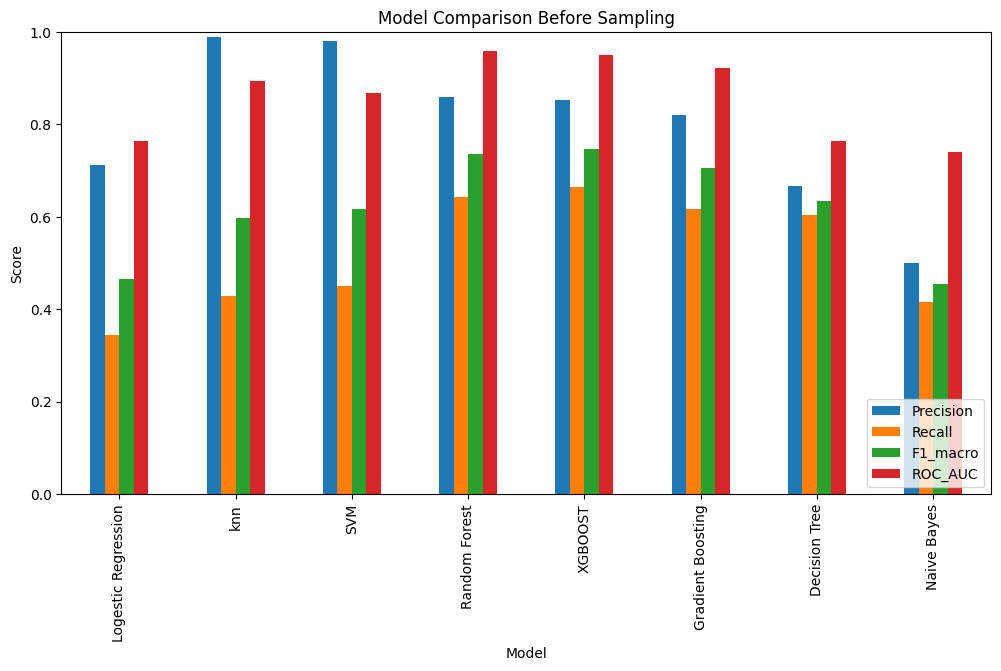

In [407]:
import matplotlib.pyplot as plt

metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_bs_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison Before Sampling")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()


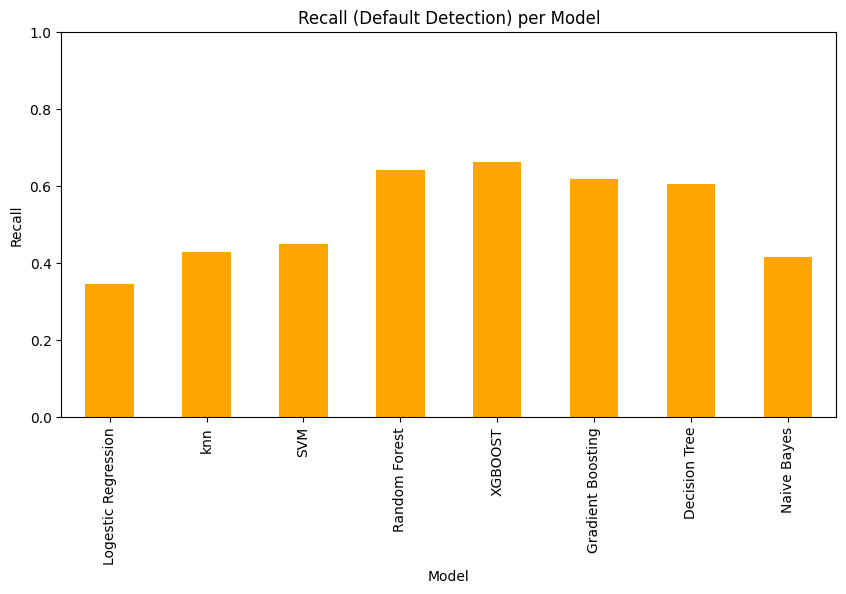

In [394]:
results_bs_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()


In [398]:
results_rus_df=pd.DataFrame(results_rus).T
results_rus_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.751678,0.417143,0.613445,0.496599,0.765345
knn_results,KNN,0.814597,0.527687,0.680672,0.594495,0.838204
svm_results,SVM,0.770134,0.452128,0.714286,0.553746,0.824853
rf_results,Random Forest,0.875,0.643087,0.840336,0.728597,0.934654
xgb_results,XGBOOST,0.878356,0.659794,0.806723,0.725898,0.922154
gb_results,Gradient Boosting,0.869128,0.635762,0.806723,0.711111,0.916173
dt_results,Decision Tree,0.791946,0.486559,0.760504,0.593443,0.780147
nb_results,Naive Bayes,0.78943,0.471111,0.445378,0.457883,0.744094


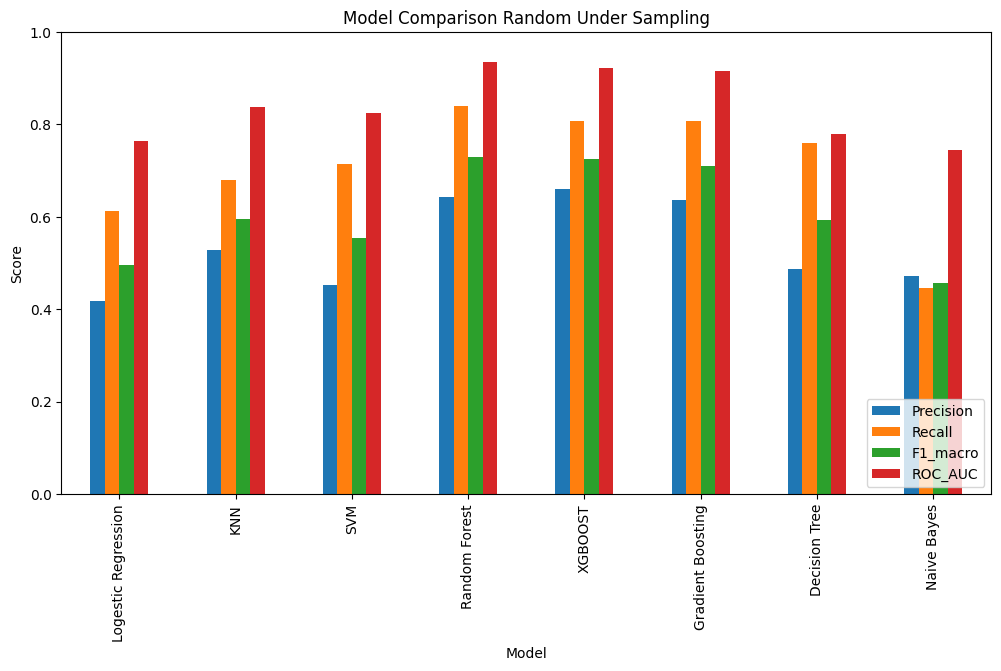

In [408]:
import matplotlib.pyplot as plt

metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_rus_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison Random Under Sampling")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

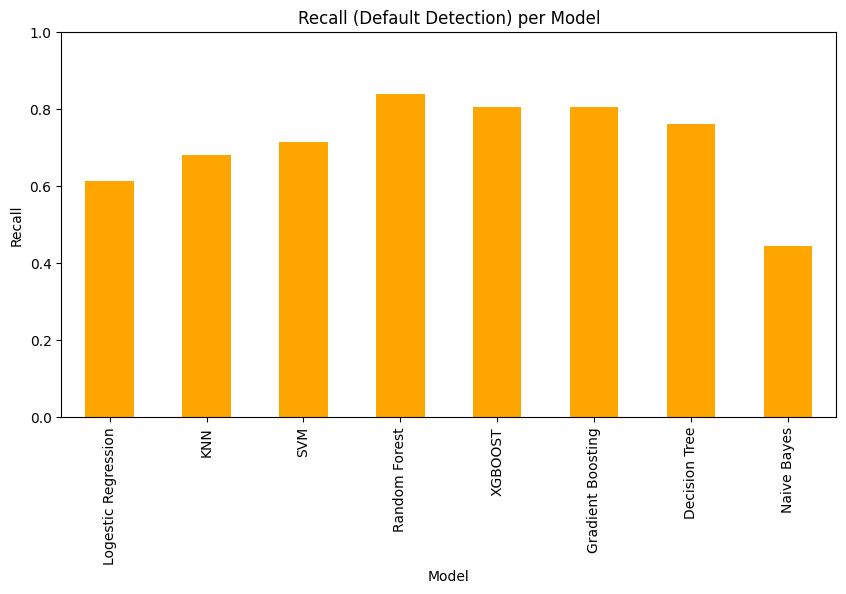

In [400]:
results_rus_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()


In [395]:
results_smote_df=pd.DataFrame(results_smote).T
results_smote_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.78104,0.456929,0.512605,0.483168,0.739676
knn_results,KNN,0.936242,0.987952,0.689076,0.811881,0.926649
svm_results,SVM,0.864094,0.663793,0.647059,0.655319,0.851492
rf_results,Random Forest,0.916107,0.834951,0.722689,0.774775,0.959637
xgb_results,XGBOOST,0.927852,0.895833,0.722689,0.8,0.955596
gb_results,Gradient Boosting,0.878356,0.703057,0.676471,0.689507,0.905116
dt_results,Decision Tree,0.855705,0.636364,0.647059,0.641667,0.777408
nb_results,Naive bayes,0.78104,0.449782,0.432773,0.441113,0.730872


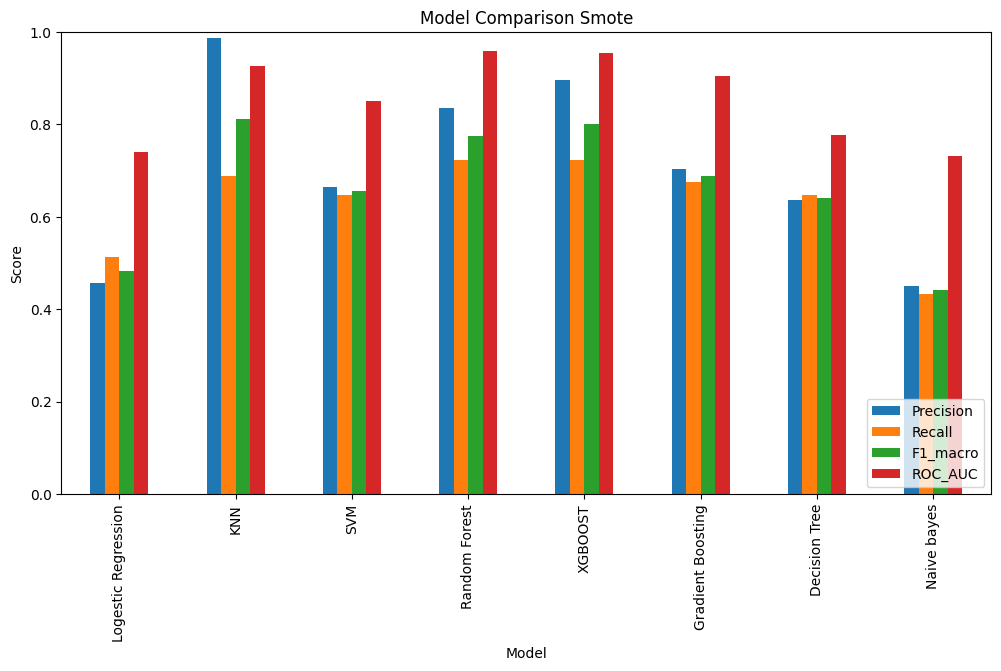

In [409]:
import matplotlib.pyplot as plt

metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_smote_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison Smote")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()


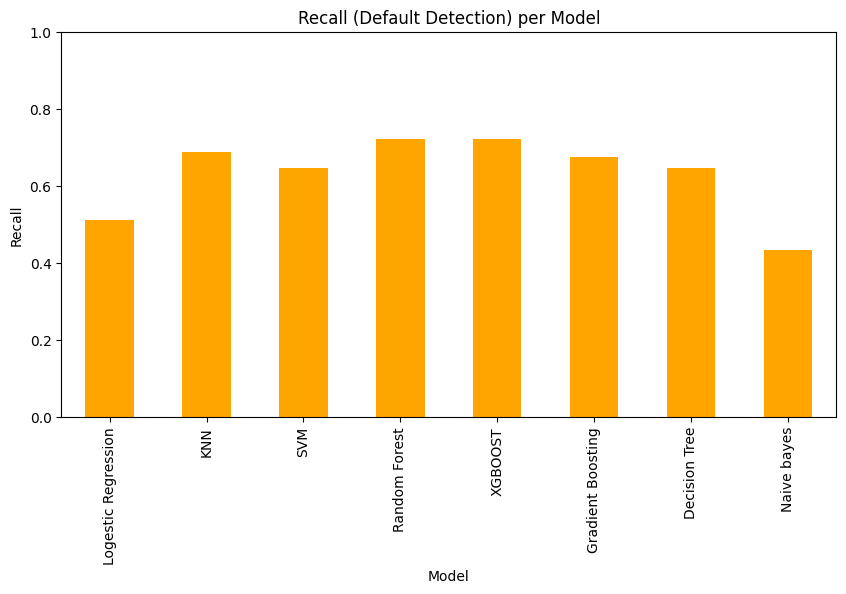

In [397]:
results_smote_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()


In [141]:
results_adasyn_df=pd.DataFrame(results_adasyn).T
results_adasyn_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.787752,0.471483,0.521008,0.49501,0.739434
knn_results,KNN,0.931208,0.96988,0.676471,0.79703,0.923793
svm_results,SVM,0.864933,0.666667,0.647059,0.656716,0.848885
rf_results,Random Forest,0.907718,0.81068,0.701681,0.752252,0.96167
xgb_results,XGBOOST,0.916107,0.852041,0.701681,0.769585,0.951113
gb_results,Gradient Boosting,0.883389,0.712446,0.697479,0.704883,0.905398
dt_results,Decision Tree,0.875839,0.678571,0.718487,0.697959,0.816791
nb_results,Naive bayes,0.786074,0.460094,0.411765,0.43459,0.715118


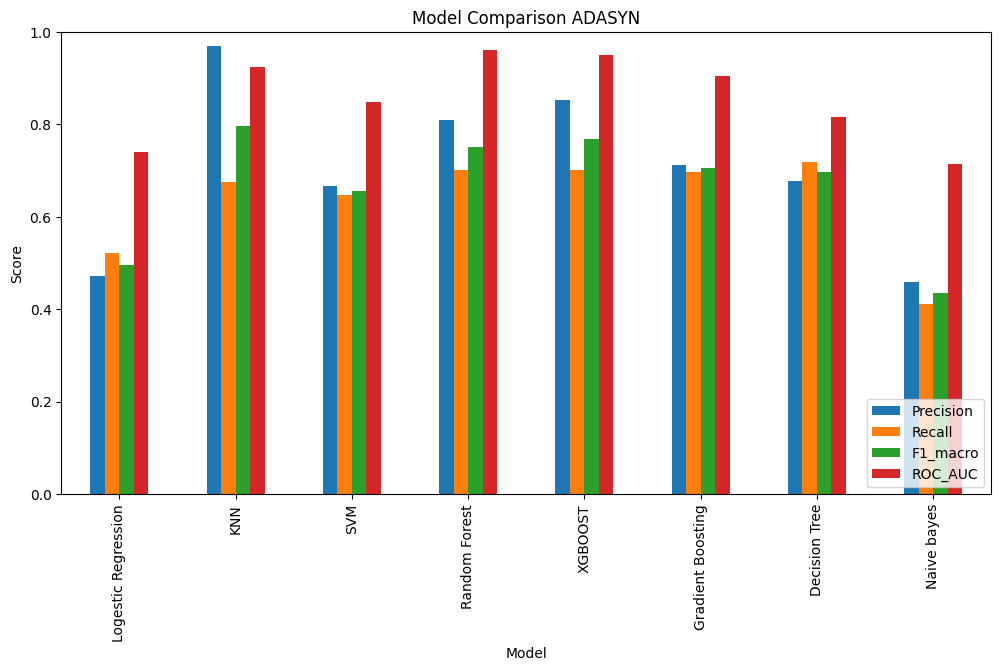

In [144]:
metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_adasyn_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison ADASYN")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

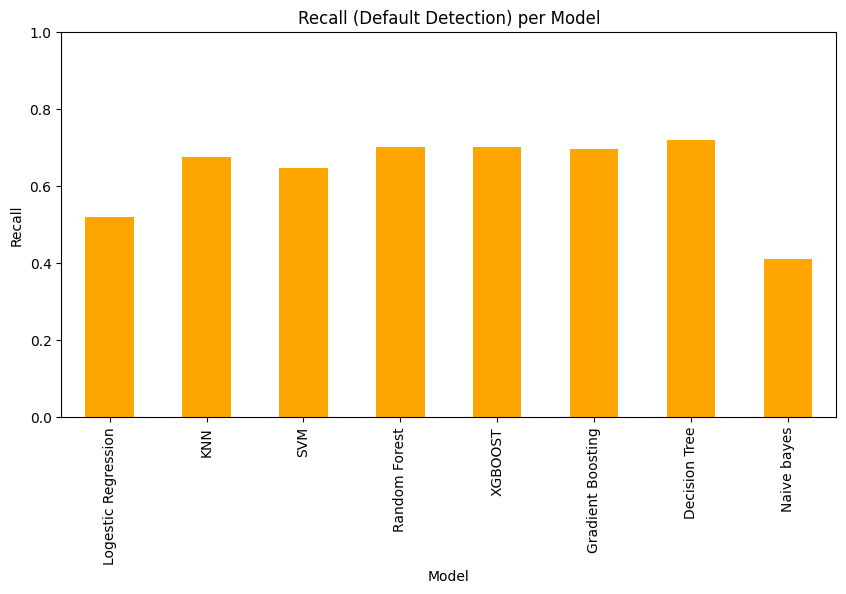

In [143]:
results_adasyn_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()

In [401]:
results_smoteenn_df=pd.DataFrame(results_smoteenn).T
results_smoteenn_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.752517,0.412844,0.567227,0.477876,0.735735
knn_results,KNN,0.886745,0.73516,0.676471,0.704595,0.870961
svm_results,SVM,0.817114,0.532051,0.697479,0.603636,0.831642
rf_results,Random Forest,0.901846,0.761905,0.739496,0.750533,0.945557
xgb_results,XGBOOST,0.905201,0.790698,0.714286,0.750552,0.938631
gb_results,Gradient Boosting,0.864094,0.645038,0.710084,0.676,0.897816
dt_results,Decision Tree,0.833893,0.572464,0.663866,0.614786,0.770088
nb_results,Naive Bayes,0.760067,0.408397,0.44958,0.428,0.723845


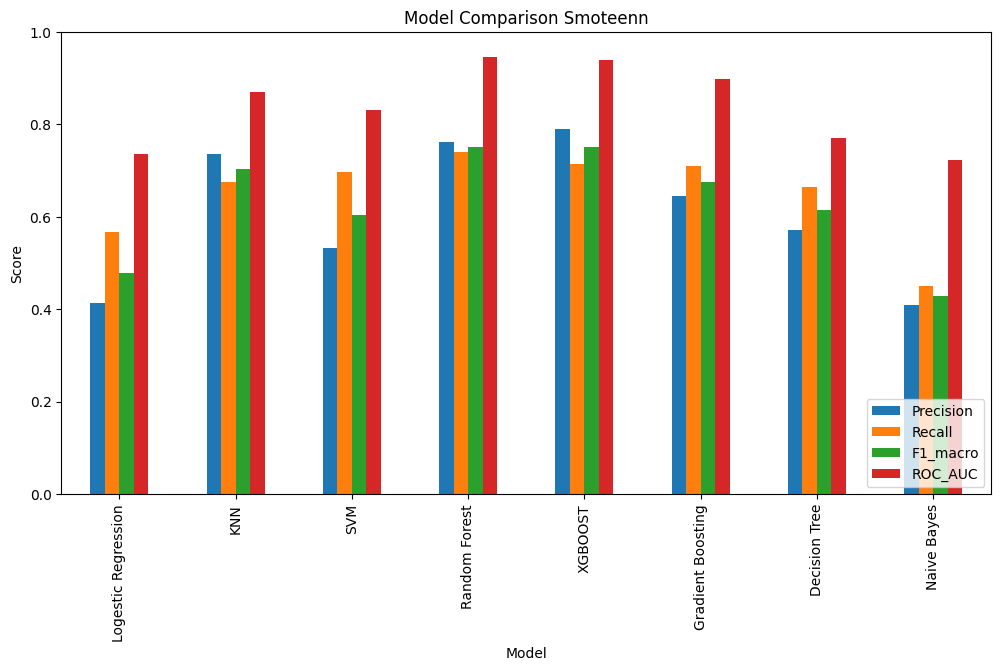

In [411]:
metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_smoteenn_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison Smoteenn")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

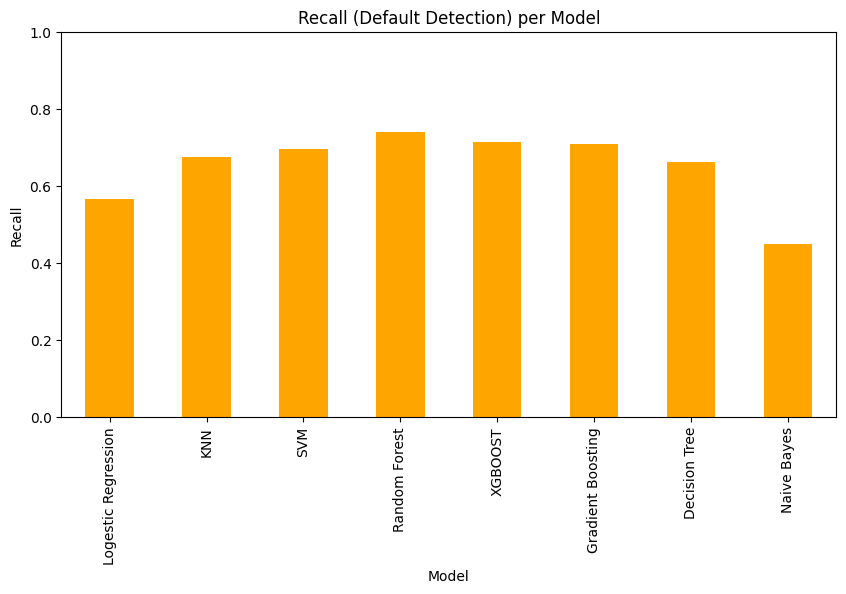

In [403]:
results_smoteenn_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()

In [404]:
results_smotetomek_df=pd.DataFrame(results_smotetomek).T
results_smotetomek_df

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
lr_results,Logestic Regression,0.780201,0.455224,0.512605,0.482213,0.738928
knn_results,KNN,0.933725,0.981818,0.680672,0.80397,0.924017
svm_results,SVM,0.85906,0.647059,0.647059,0.647059,0.853186
rf_results,Random Forest,0.909396,0.821782,0.697479,0.754545,0.959787
xgb_results,XGBOOST,0.913591,0.849741,0.689076,0.761021,0.955587
gb_results,Gradient Boosting,0.880872,0.708696,0.684874,0.696581,0.904341
dt_results,Decision Tree,0.852349,0.631356,0.62605,0.628692,0.767428
nb_results,Naive Bayes,0.77349,0.432773,0.432773,0.432773,0.730687


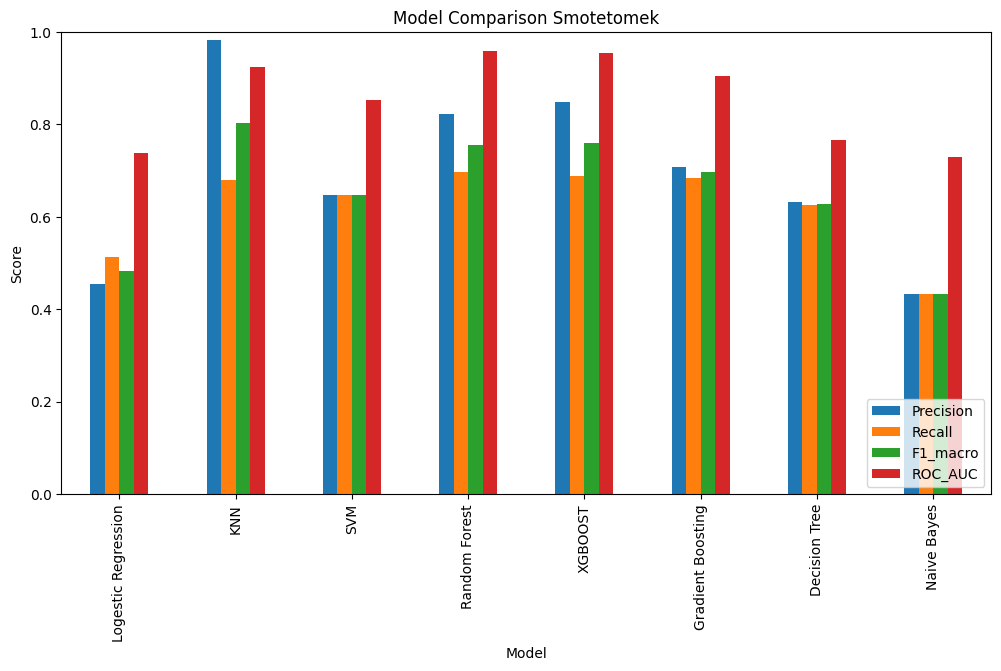

In [413]:
metrics = ["Precision", "Recall", "F1_macro", "ROC_AUC"]

results_smotetomek_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison Smotetomek")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

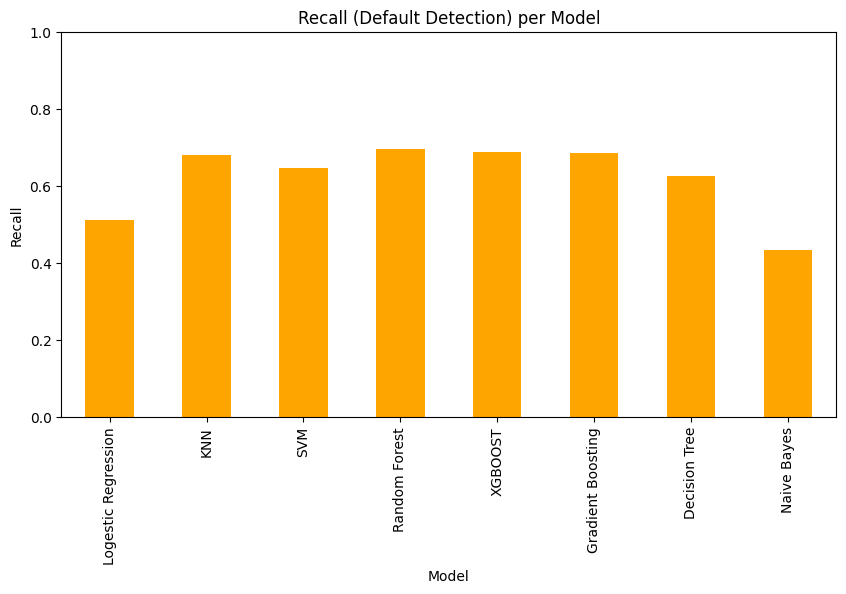

In [414]:
results_smotetomek_df.set_index("Model")["Recall"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Recall (Default Detection) per Model")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()

# Hyperparameter Tuning

In [320]:
hp_best_param={}

In [446]:
results_before_smote={}
results_after_smote={}

## Before SMOTE

In [441]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [442]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [444]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [324]:
rf_params = {
    "n_estimators": [200, 300,400,500],
    "max_depth": [10,18,20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False],
    "class_weight": [None, "balanced"]
}



In [325]:
rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
rf_grid.fit(X_train, y_train)

print("\n=== Random Forest (No SMOTE) ===")
print("Best Params:", rf_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, rf_grid.predict(X_test)))


=== Random Forest (No SMOTE) ===
Best Params: {'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
ROC-AUC: 0.9675514860032063
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       954
           1       0.87      0.65      0.74       238

    accuracy                           0.91      1192
   macro avg       0.89      0.81      0.84      1192
weighted avg       0.91      0.91      0.91      1192



In [326]:
rf_result=pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_score')
rf_result=rf_result[['mean_train_score','mean_test_score','std_test_score','params']]
rf_result[rf_result['params']==rf_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
792,1.0,0.797743,0.018585,"{'bootstrap': False, 'class_weight': None, 'ma..."


In [447]:
results_before_smote["Random Forest"]=evaluate_and_store(rf_grid.best_estimator_,X_train,y_train,X_test,y_test,name="Random Forest")

In [327]:
hp_best_param['Random Forest before SMOTE']=rf_grid.best_params_

In [328]:
log_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}


In [329]:

log = LogisticRegression(max_iter=500, random_state=42)

log_grid = GridSearchCV(log, log_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
log_grid.fit(X_train, y_train)

print("\n=== Logistic Regression (No SMOTE) ===")
print("Best Params:", log_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, log_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, log_grid.predict(X_test)))


=== Logistic Regression (No SMOTE) ===
Best Params: {'C': 1, 'solver': 'lbfgs'}
ROC-AUC: 0.7638778781953033
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       954
           1       0.71      0.34      0.46       238

    accuracy                           0.84      1192
   macro avg       0.78      0.65      0.69      1192
weighted avg       0.83      0.84      0.82      1192



In [330]:
log_result=pd.DataFrame(log_grid.cv_results_).sort_values(by='mean_test_score')
log_result=log_result[['mean_train_score','mean_test_score','std_test_score','params']]
log_result[log_result['params']==log_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
5,0.445892,0.441409,0.00731,"{'C': 1, 'solver': 'lbfgs'}"


In [449]:
results_before_smote["Logistic Regression"]=evaluate_and_store(log_grid.best_estimator_,X_train,y_train,X_test,y_test,name="Logistic Regression")

In [331]:
hp_best_param['Logestic Regression before SMOTE']=log_grid.best_params_

In [332]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}


In [333]:
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
knn_grid.fit(X_train, y_train)

print("\n=== KNN (No SMOTE) ===")
print("Best Params:", knn_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, knn_grid.predict(X_test)))


=== KNN (No SMOTE) ===
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
ROC-AUC: 0.8945593960854781
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       954
           1       0.99      0.59      0.74       238

    accuracy                           0.92      1192
   macro avg       0.95      0.80      0.85      1192
weighted avg       0.92      0.92      0.91      1192



In [334]:
knn_result=pd.DataFrame(knn_grid.cv_results_).sort_values(by='mean_test_score')
knn_result=knn_result[['mean_train_score','mean_test_score','std_test_score','params']]
knn_result[knn_result['params']==knn_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
1,1.0,0.711054,0.016793,"{'n_neighbors': 3, 'weights': 'distance'}"


In [450]:
results_before_smote["KNN"]=evaluate_and_store(knn_grid.best_estimator_,X_train,y_train,X_test,y_test,name="KNN")

In [335]:
hp_best_param['KNN before SMOTE']=knn_grid.best_params_

In [336]:
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [337]:
xgb = XGBClassifier(eval_metric="logloss", random_state=42)


xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
xgb_grid.fit(X_train, y_train)

print("\n=== XGBoost (No SMOTE) ===")
print("Best Params:", xgb_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, xgb_grid.predict(X_test)))


=== XGBoost (No SMOTE) ===
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
ROC-AUC: 0.9580492574388246
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.87      0.69      0.77       238

    accuracy                           0.92      1192
   macro avg       0.90      0.83      0.86      1192
weighted avg       0.92      0.92      0.91      1192



In [338]:
xgb_result=pd.DataFrame(xgb_grid.cv_results_).sort_values(by='mean_test_score')
xgb_result=xgb_result[['mean_train_score','mean_test_score','std_test_score','params']]
xgb_result[xgb_result['params']==xgb_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
66,0.999212,0.795231,0.026226,"{'colsample_bytree': 1.0, 'learning_rate': 0.2..."


In [451]:
results_before_smote["XGBOOST"]=evaluate_and_store(xgb_grid.best_estimator_,X_train,y_train,X_test,y_test,name="XGBOOST")

In [339]:
hp_best_param['XGBoost before SMOTE']=xgb_grid.best_params_

In [340]:
dt_params = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

In [341]:
dt = DecisionTreeClassifier(random_state=42)


dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
dt_grid.fit(X_train, y_train)

print("\n=== Decision Tree (No SMOTE) ===")
print("Best Params:", dt_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, dt_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, dt_grid.predict(X_test)))


=== Decision Tree (No SMOTE) ===
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
ROC-AUC: 0.8744516674594366
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       954
           1       0.72      0.65      0.68       238

    accuracy                           0.88      1192
   macro avg       0.82      0.79      0.80      1192
weighted avg       0.87      0.88      0.88      1192



In [342]:
dt_result=pd.DataFrame(dt_grid.cv_results_).sort_values(by='mean_test_score')
dt_result=dt_result[['mean_train_score','mean_test_score','std_test_score','params']]
dt_result[dt_result['params']==dt_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
11,0.728985,0.698639,0.029171,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [452]:
results_before_smote["Decision Tree"]=evaluate_and_store(dt_grid.best_estimator_,X_train,y_train,X_test,y_test,name="Decision Tree")

In [343]:
hp_best_param['Decision Tree before SMOTE']=dt_grid.best_params_

In [344]:
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}

In [345]:
gb = GradientBoostingClassifier(random_state=42)


gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
gb_grid.fit(X_train, y_train)

print("\n=== Gradient Boosting (No SMOTE) ===")
print("Best Params:", gb_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, gb_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, gb_grid.predict(X_test)))


=== Gradient Boosting (No SMOTE) ===
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
ROC-AUC: 0.9506632841815973
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       954
           1       0.87      0.68      0.76       238

    accuracy                           0.91      1192
   macro avg       0.89      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



In [346]:
gb_result=pd.DataFrame(gb_grid.cv_results_).sort_values(by='mean_test_score')
gb_result=gb_result[['mean_train_score','mean_test_score','std_test_score','params']]
gb_result[gb_result['params']==gb_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
15,0.980241,0.790777,0.020703,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [453]:
results_before_smote["Gradient Boosting"]=evaluate_and_store(gb_grid.best_estimator_,X_train,y_train,X_test,y_test,name="Gradient Boosting")

In [347]:
hp_best_param['Gradient Boosting before SMOTE']=gb_grid.best_params_

In [348]:
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

In [349]:
svm = SVC(probability=True, random_state=42)


svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
svm_grid.fit(X_train, y_train)

print("\n=== SVM (No SMOTE) ===")
print("Best Params:", svm_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, svm_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, svm_grid.predict(X_test)))


=== SVM (No SMOTE) ===
Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
ROC-AUC: 0.9035198985254479
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       954
           1       0.98      0.59      0.74       238

    accuracy                           0.92      1192
   macro avg       0.94      0.79      0.84      1192
weighted avg       0.92      0.92      0.91      1192



In [350]:
svm_result=pd.DataFrame(svm_grid.cv_results_).sort_values(by='mean_test_score')
svm_result=svm_result[['mean_train_score','mean_test_score','std_test_score','params']]
svm_result[svm_result['params']==svm_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
11,0.818523,0.715309,0.02545,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"


In [454]:
results_before_smote["SVM"]=evaluate_and_store(svm_grid.best_estimator_,X_train,y_train,X_test,y_test,name="SVM")

In [351]:
hp_best_param['SVM before SMOTE']=svm_grid.best_params_

In [352]:
nb_params = {
    "var_smoothing": np.logspace(-9, -6, 4)
}

In [353]:
nb=GaussianNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
nb_grid.fit(X_train, y_train)

print("\n=== Naive Bayes (No SMOTE) ===")
print("Best Params:", nb_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, nb_grid.predict_proba(X_test)[:,1]))
print(classification_report(y_test, nb_grid.predict(X_test)))


=== Naive Bayes (No SMOTE) ===
Best Params: {'var_smoothing': 1e-09}
ROC-AUC: 0.7397952891848564
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       954
           1       0.50      0.42      0.45       238

    accuracy                           0.80      1192
   macro avg       0.68      0.66      0.67      1192
weighted avg       0.79      0.80      0.79      1192



In [354]:
nb_result=pd.DataFrame(nb_grid.cv_results_).sort_values(by='mean_test_score')
nb_result=nb_result[['mean_train_score','mean_test_score','std_test_score','params']]
nb_result[nb_result['params']==nb_grid.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
0,0.451588,0.448141,0.005639,{'var_smoothing': 1e-09}


In [455]:
results_before_smote["Naive Bayes"]=evaluate_and_store(nb_grid.best_estimator_,X_train,y_train,X_test,y_test,name="Naive Bayes")

In [355]:
hp_best_param['Naive Bayes before SMOTE']=nb_grid.best_params_

In [456]:
results_before_smote

{'Random Forest': {'Model': 'Random Forest',
  'Accuracy': 0.910234899328859,
  'Precision': 0.8659217877094972,
  'Recall': 0.6512605042016807,
  'F1_macro': 0.7434052757793765,
  'ROC_AUC': 0.9675514860032063},
 'Logistic Regression': {'Model': 'Logistic Regression',
  'Accuracy': 0.8414429530201343,
  'Precision': 0.7130434782608696,
  'Recall': 0.3445378151260504,
  'F1_macro': 0.46458923512747874,
  'ROC_AUC': 0.7638778781953033},
 'KNN': {'Model': 'KNN',
  'Accuracy': 0.9177852348993288,
  'Precision': 0.9929577464788732,
  'Recall': 0.592436974789916,
  'F1_macro': 0.7421052631578947,
  'ROC_AUC': 0.8945593960854781},
 'XGBOOST': {'Model': 'XGBOOST',
  'Accuracy': 0.9177852348993288,
  'Precision': 0.8723404255319149,
  'Recall': 0.6890756302521008,
  'F1_macro': 0.7699530516431925,
  'ROC_AUC': 0.9580492574388246},
 'Decision Tree': {'Model': 'Decision Tree',
  'Accuracy': 0.8783557046979866,
  'Precision': 0.7162790697674418,
  'Recall': 0.6470588235294118,
  'F1_macro': 0.679

In [457]:
df_before=pd.DataFrame(results_before_smote).T
df_before

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
Random Forest,Random Forest,0.910235,0.865922,0.651261,0.743405,0.967551
Logistic Regression,Logistic Regression,0.841443,0.713043,0.344538,0.464589,0.763878
KNN,KNN,0.917785,0.992958,0.592437,0.742105,0.894559
XGBOOST,XGBOOST,0.917785,0.87234,0.689076,0.769953,0.958049
Decision Tree,Decision Tree,0.878356,0.716279,0.647059,0.679912,0.874452
Gradient Boosting,Gradient Boosting,0.91443,0.865591,0.676471,0.759434,0.950663
SVM,SVM,0.916107,0.979167,0.592437,0.73822,0.90352
Naive Bayes,Naive Bayes,0.800336,0.5,0.415966,0.454128,0.739795


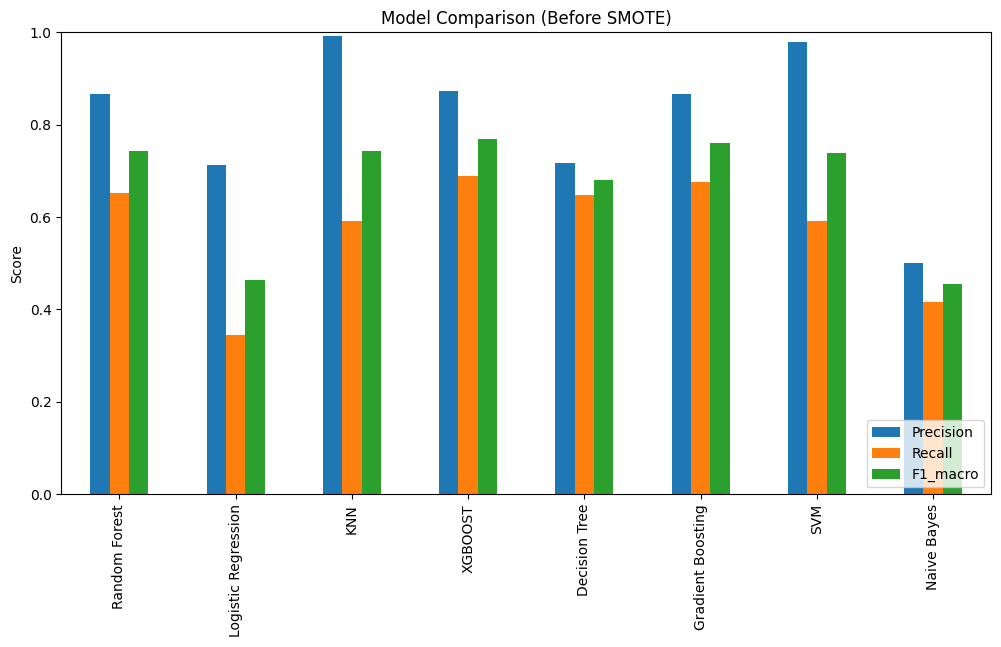

In [458]:

metrics = ["Precision", "Recall", "F1_macro"]

df_before[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison (Before SMOTE)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

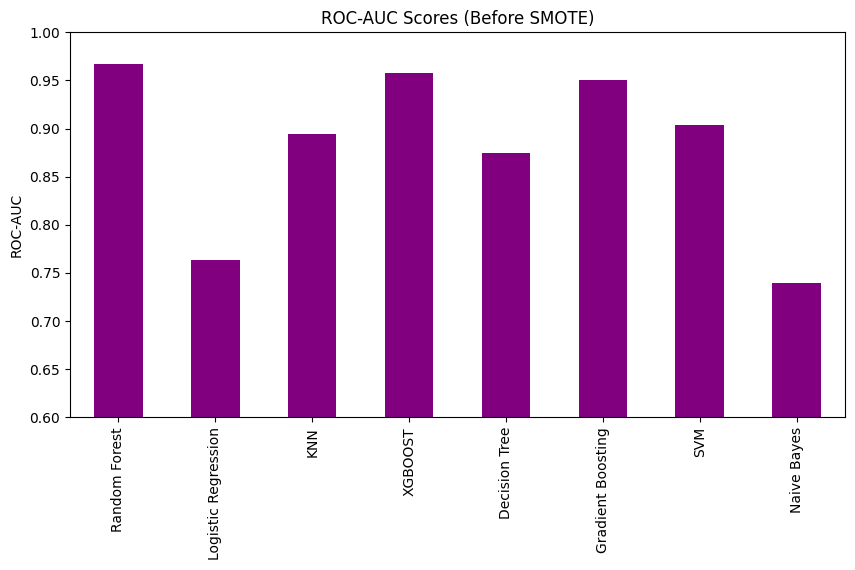

In [459]:
df_before["ROC_AUC"].plot(kind="bar", figsize=(10,5), color="purple")
plt.title("ROC-AUC Scores (Before SMOTE)")
plt.ylabel("ROC-AUC")
plt.ylim(0.6,1.0)
plt.show()


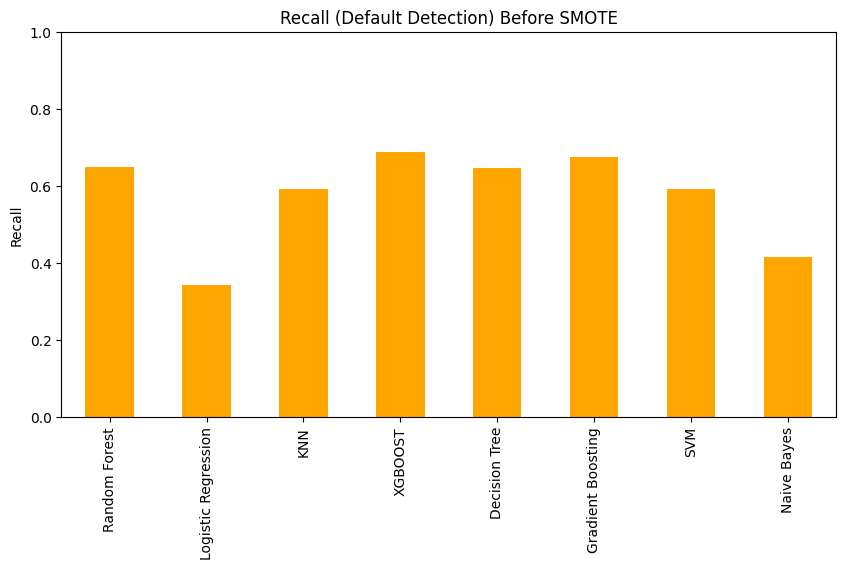

In [460]:
df_before["Recall"].plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Recall (Default Detection) Before SMOTE")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()


### voting classifier

In [356]:
best_models=[
    ("logreg",log_grid.best_estimator_),
    ("knn",knn_grid.best_estimator_),
    ("svm",svm_grid.best_estimator_),
    ("rf",rf_grid.best_estimator_),
    ("xgb",xgb_grid.best_estimator_),
    ("gb",gb_grid.best_estimator_),
    ("dt",dt_grid.best_estimator_),
    ("nb",nb_grid.best_estimator_)
]

In [421]:

voting_clf=VotingClassifier(best_models,voting="soft")
voting_clf.fit(X_train,y_train)
y_pred=voting_clf.predict(X_test)
y_proba=voting_clf.predict_proba(X_test)
print("=== Voting Classifier (No SMOTE) ===")
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba[:,1]))
scores=cross_val_score(voting_clf,X_train,y_train,cv=5,scoring="f1")
print("Voting CV score:",scores)
print("Mean F1 score:",scores.mean())


=== Voting Classifier (No SMOTE) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       954
           1       0.93      0.58      0.71       238

    accuracy                           0.91      1192
   macro avg       0.92      0.78      0.83      1192
weighted avg       0.91      0.91      0.90      1192

ROC-AUC: 0.9634004545214312
Voting CV score: [0.75471698 0.73482428 0.7654321  0.7266881  0.74358974]
Mean F1 score: 0.7450502415062603


### stacking classifier

In [422]:
meta_model=LogisticRegression(max_iter=500,random_state=42)
stacking_clf=StackingClassifier(best_models,final_estimator=meta_model,stack_method="predict_proba",n_jobs=-1,cv=5)
stacking_clf.fit(X_train,y_train)
print("=== Stacking Classifier (No SMOTE) ===")
y_pred=stacking_clf.predict(X_test)
y_proba=stacking_clf.predict_proba(X_test)
print("Classification Report")
print(classification_report(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba[:,1]))
scores=cross_val_score(stacking_clf,X_train,y_train,cv=5,scoring="f1")
print("Stacking CV score:",scores)
print("Mean F1 score:",scores.mean())

=== Stacking Classifier (No SMOTE) ===
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       954
           1       0.94      0.82      0.87       238

    accuracy                           0.95      1192
   macro avg       0.95      0.90      0.92      1192
weighted avg       0.95      0.95      0.95      1192

ROC-AUC: 0.9851928192660713
Stacking CV score: [0.84180791 0.87804878 0.85558583 0.88828338 0.86575342]
Mean F1 score: 0.8658958649118247


## After SMOTE

In [463]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [464]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [465]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [466]:
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

In [363]:
rf = RandomForestClassifier(random_state=42)
rf_grid_smote = GridSearchCV(rf, rf_params, cv=5, scoring="f1", n_jobs=-1,return_train_score=True)

rf_grid_smote.fit(X_train, y_train)

print("\n=== Random Forest (With SMOTE) ===")
print("Best Params:", rf_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, rf_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, rf_grid_smote.predict(X_test)))


=== Random Forest (With SMOTE) ===
Best Params: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
ROC-AUC: 0.9697161883621374
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       954
           1       0.83      0.74      0.78       238

    accuracy                           0.92      1192
   macro avg       0.88      0.85      0.87      1192
weighted avg       0.92      0.92      0.92      1192



In [364]:
rf_result_smote=pd.DataFrame(rf_grid_smote.cv_results_).sort_values(by='mean_test_score')
rf_result_smote=rf_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
rf_result_smote[rf_result_smote['params']==rf_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
1082,1.0,0.963125,0.013253,"{'bootstrap': False, 'class_weight': 'balanced..."


In [467]:
results_after_smote["Random Forest"]=evaluate_and_store(rf_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="Random Forest")

In [468]:
results_after_smote

{'Random Forest': {'Model': 'Random Forest',
  'Accuracy': 0.9186241610738255,
  'Precision': 0.8309859154929577,
  'Recall': 0.7436974789915967,
  'F1_macro': 0.7849223946784922,
  'ROC_AUC': 0.9697161883621374}}

In [365]:
hp_best_param['Random Forest After SMOTE']=rf_grid_smote.best_params_

In [366]:
log = LogisticRegression(max_iter=500, random_state=42)
log_grid_smote = GridSearchCV(log,log_params,cv=5,scoring="f1",n_jobs=-1,return_train_score=True)

log_grid_smote.fit(X_train, y_train)

print("\n=== Logistic Regression (With SMOTE) ===")
print("Best Params:", log_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, log_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, log_grid_smote.predict(X_test)))


=== Logistic Regression (With SMOTE) ===
Best Params: {'C': 0.01, 'solver': 'liblinear'}
ROC-AUC: 0.7622526998220672
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       954
           1       0.41      0.62      0.49       238

    accuracy                           0.75      1192
   macro avg       0.65      0.70      0.66      1192
weighted avg       0.80      0.75      0.77      1192



In [367]:
log_result_smote=pd.DataFrame(log_grid_smote.cv_results_).sort_values(by='mean_test_score')
log_result_smote=log_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
log_result_smote[log_result_smote['params']==log_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
0,0.724757,0.722419,0.011805,"{'C': 0.01, 'solver': 'liblinear'}"


In [469]:
results_after_smote["Logestic Regression"]=evaluate_and_store(log_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="Logestic Regression")

In [368]:
hp_best_param['Logistic Regression After SMOTE']=log_grid_smote.best_params_

In [369]:
knn = KNeighborsClassifier()
knn_grid_smote = GridSearchCV(knn, knn_params,
                              cv=5, scoring="f1", n_jobs=-1,return_train_score=True)

knn_grid_smote.fit(X_train, y_train)

print("\n=== KNN (With SMOTE) ===")
print("Best Params:", knn_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, knn_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, knn_grid_smote.predict(X_test)))


=== KNN (With SMOTE) ===
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
ROC-AUC: 0.912359283335976
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.95      0.79      0.86       238

    accuracy                           0.95      1192
   macro avg       0.95      0.89      0.91      1192
weighted avg       0.95      0.95      0.95      1192



In [370]:
knn_result_smote=pd.DataFrame(knn_grid_smote.cv_results_).sort_values(by='mean_test_score')
knn_result_smote=knn_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
knn_result_smote[knn_result_smote['params']==knn_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
1,1.0,0.987591,0.001796,"{'n_neighbors': 3, 'weights': 'distance'}"


In [470]:
results_after_smote["KNN"]=evaluate_and_store(knn_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="KNN")

In [371]:
hp_best_param['KNN After SMOTE']=knn_grid_smote.best_params_

In [372]:
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_grid_smote = GridSearchCV(xgb, xgb_params,
                              cv=5, scoring="f1", n_jobs=-1,return_train_score=True)

xgb_grid_smote.fit(X_train, y_train)

print("\n=== XGBoost (With SMOTE) ===")
print("Best Params:", xgb_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, xgb_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, xgb_grid_smote.predict(X_test)))


=== XGBoost (With SMOTE) ===
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
ROC-AUC: 0.9617796804256293
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.87      0.73      0.79       238

    accuracy                           0.92      1192
   macro avg       0.90      0.85      0.87      1192
weighted avg       0.92      0.92      0.92      1192



In [373]:
xgb_result_smote=pd.DataFrame(xgb_grid_smote.cv_results_).sort_values(by='mean_test_score')
xgb_result_smote=xgb_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
xgb_result_smote[xgb_result_smote['params']==xgb_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
34,1.0,0.955305,0.035834,"{'colsample_bytree': 0.8, 'learning_rate': 0.2..."


In [478]:
results_after_smote["XGBOOST"]=evaluate_and_store(xgb_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="XGBOOST")

In [374]:
hp_best_param['XGBOOST After SMOTE']=xgb_grid_smote.best_params_

In [375]:
dt = DecisionTreeClassifier(random_state=42)
dt_grid_smote = GridSearchCV(dt, dt_params,
                             cv=5, scoring="f1", n_jobs=-1,return_train_score=True)

dt_grid_smote.fit(X_train, y_train)

print("\n=== Decision Tree (With SMOTE) ===")
print("Best Params:", dt_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, dt_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, dt_grid_smote.predict(X_test)))


=== Decision Tree (With SMOTE) ===
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
ROC-AUC: 0.7663883163328225
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       954
           1       0.61      0.63      0.62       238

    accuracy                           0.85      1192
   macro avg       0.76      0.77      0.76      1192
weighted avg       0.85      0.85      0.85      1192



In [376]:
dt_result_smote=pd.DataFrame(dt_grid_smote.cv_results_).sort_values(by='mean_test_score')
dt_result_smote=dt_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
dt_result_smote[dt_result_smote['params']==dt_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
63,1.0,0.89529,0.027277,"{'criterion': 'entropy', 'max_depth': None, 'm..."


In [471]:
results_after_smote["Decision Tree"]=evaluate_and_store(dt_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="Decision Tree")

In [377]:
hp_best_param['Decision Tree After SMOTE']=dt_grid.best_params_

In [378]:
gb = GradientBoostingClassifier(random_state=42)
gb_grid_smote = GridSearchCV(gb, gb_params,
                             cv=5, scoring="f1", n_jobs=-1,return_train_score=True)

gb_grid_smote.fit(X_train, y_train)

print("\n=== Gradient Boosting (With SMOTE) ===")
print("Best Params:", gb_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, gb_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, gb_grid_smote.predict(X_test)))


=== Gradient Boosting (With SMOTE) ===
Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
ROC-AUC: 0.9540281521413597
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.85      0.71      0.78       238

    accuracy                           0.92      1192
   macro avg       0.89      0.84      0.86      1192
weighted avg       0.92      0.92      0.91      1192



In [379]:
gb_result_smote=pd.DataFrame(gb_grid_smote.cv_results_).sort_values(by='mean_test_score')
gb_result_smote=gb_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
gb_result_smote[gb_result_smote['params']==gb_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
23,0.999738,0.942043,0.050605,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."


In [472]:
results_after_smote["Gradient Boosting"]=evaluate_and_store(gb_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="Gradient Boosting")

In [380]:
hp_best_param['Gradient Boosting After SMOTE']=gb_grid_smote.best_params_

In [381]:
svm=SVC(probability=True,random_state=42)
svm_grid_smote = GridSearchCV(svm, svm_params,
                              cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
svm_grid_smote.fit(X_train, y_train)

print("\n=== SVM (With SMOTE) ===")
print("Best Params:", svm_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, svm_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, svm_grid_smote.predict(X_test)))


=== SVM (With SMOTE) ===
Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
ROC-AUC: 0.8966338107570073
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       954
           1       0.71      0.75      0.73       238

    accuracy                           0.89      1192
   macro avg       0.82      0.84      0.83      1192
weighted avg       0.89      0.89      0.89      1192



In [382]:
svm_result_smote=pd.DataFrame(svm_grid_smote.cv_results_).sort_values(by='mean_test_score')
svm_result_smote=svm_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
svm_result_smote[svm_result_smote['params']==svm_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
11,0.92436,0.909967,0.008495,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"


In [473]:
results_after_smote["SVM"]=evaluate_and_store(svm_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="SVM")

In [383]:
hp_best_param['SVM After SMOTE']=svm_grid_smote.best_params_

In [384]:
nb=GaussianNB()
nb_grid_smote = GridSearchCV(nb, nb_params,
                             cv=5, scoring="f1", n_jobs=-1,return_train_score=True)
nb_grid_smote.fit(X_train, y_train)

print("\n=== Naive Bayes (With SMOTE) ===")
print("Best Params:", nb_grid_smote.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, nb_grid_smote.predict_proba(X_test)[:,1]))
print(classification_report(y_test, nb_grid_smote.predict(X_test)))


=== Naive Bayes (With SMOTE) ===
Best Params: {'var_smoothing': 1e-09}
ROC-AUC: 0.7248097352148406
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       954
           1       0.46      0.44      0.45       238

    accuracy                           0.79      1192
   macro avg       0.66      0.66      0.66      1192
weighted avg       0.78      0.79      0.78      1192



In [385]:
nb_result_smote=pd.DataFrame(nb_grid_smote.cv_results_).sort_values(by='mean_test_score')
nb_result_smote=nb_result_smote[['mean_train_score','mean_test_score','std_test_score','params']]
nb_result_smote[nb_result_smote['params']==nb_grid_smote.best_params_]

,mean_train_score,mean_test_score,std_test_score,params
0,0.590856,0.586733,0.022359,{'var_smoothing': 1e-09}


In [474]:
results_after_smote["Naive Bayes"]=evaluate_and_store(nb_grid_smote.best_estimator_,X_train,y_train,X_test,y_test,name="Naive Bayes")

In [386]:
hp_best_param['Naive Bayes After SMOTE']=nb_grid_smote.best_params_

In [479]:
results_after_smote

{'Random Forest': {'Model': 'Random Forest',
  'Accuracy': 0.9186241610738255,
  'Precision': 0.8309859154929577,
  'Recall': 0.7436974789915967,
  'F1_macro': 0.7849223946784922,
  'ROC_AUC': 0.9697161883621374},
 'Logestic Regression': {'Model': 'Logestic Regression',
  'Accuracy': 0.7483221476510067,
  'Precision': 0.41292134831460675,
  'Recall': 0.6176470588235294,
  'F1_macro': 0.494949494949495,
  'ROC_AUC': 0.7622526998220672},
 'KNN': {'Model': 'KNN',
  'Accuracy': 0.9488255033557047,
  'Precision': 0.949238578680203,
  'Recall': 0.7857142857142857,
  'F1_macro': 0.8597701149425288,
  'ROC_AUC': 0.912359283335976},
 'Decision Tree': {'Model': 'Decision Tree',
  'Accuracy': 0.8456375838926175,
  'Precision': 0.6088709677419355,
  'Recall': 0.634453781512605,
  'F1_macro': 0.6213991769547325,
  'ROC_AUC': 0.7663883163328225},
 'Gradient Boosting': {'Model': 'Gradient Boosting',
  'Accuracy': 0.9177852348993288,
  'Precision': 0.8535353535353535,
  'Recall': 0.7100840336134454,
 

In [480]:
df_after= pd.DataFrame(results_after_smote).T
df_after

,Model,Accuracy,Precision,Recall,F1_macro,ROC_AUC
Random Forest,Random Forest,0.918624,0.830986,0.743697,0.784922,0.969716
Logestic Regression,Logestic Regression,0.748322,0.412921,0.617647,0.494949,0.762253
KNN,KNN,0.948826,0.949239,0.785714,0.85977,0.912359
Decision Tree,Decision Tree,0.845638,0.608871,0.634454,0.621399,0.766388
Gradient Boosting,Gradient Boosting,0.917785,0.853535,0.710084,0.775229,0.954028
SVM,SVM,0.888423,0.70751,0.752101,0.729124,0.896634
Naive Bayes,Naive Bayes,0.786074,0.462555,0.441176,0.451613,0.72481
XGBOOST,XGBOOST,0.924497,0.873737,0.726891,0.793578,0.96178


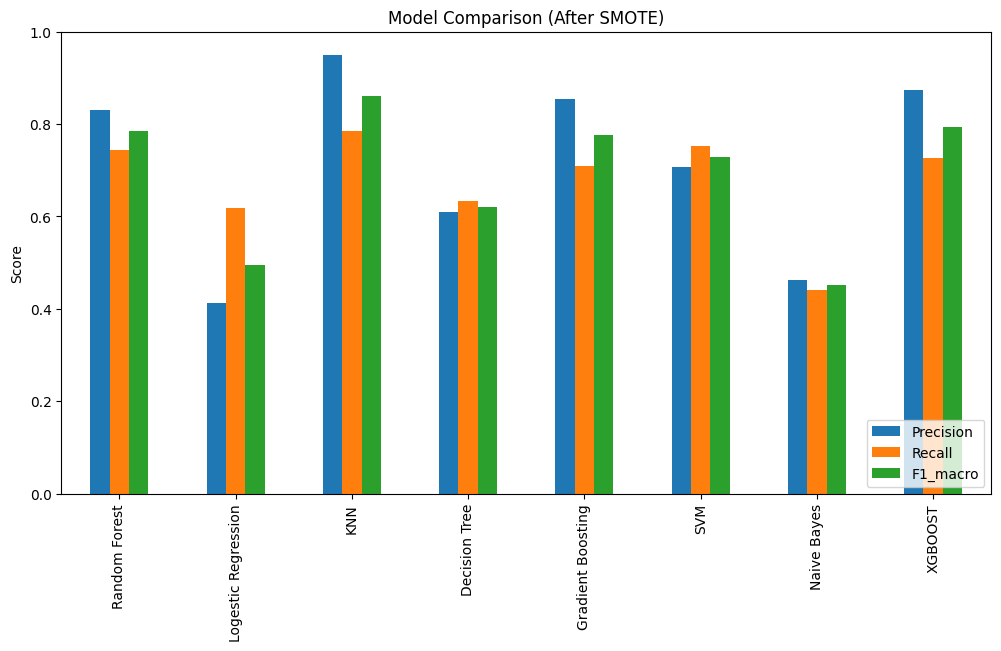

In [483]:


metrics = ["Precision", "Recall", "F1_macro"]

df_after[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison (After SMOTE)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()


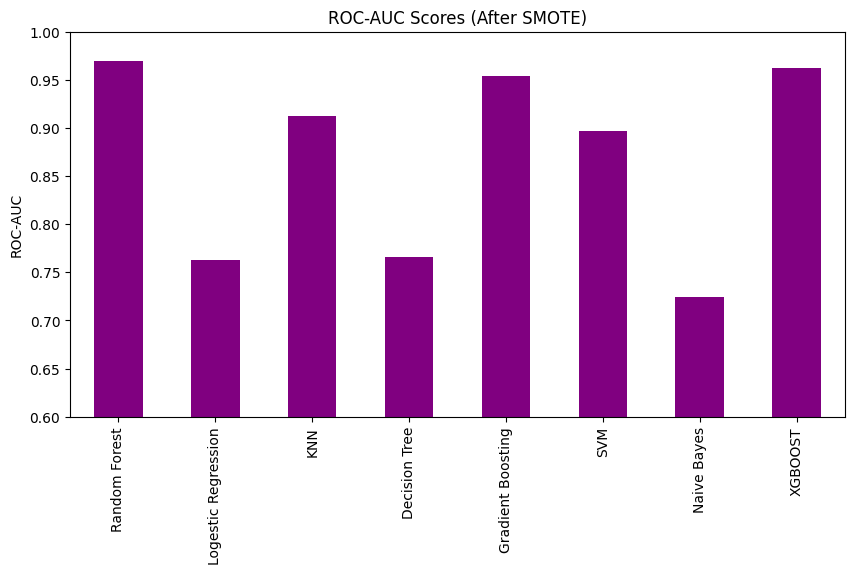

In [482]:
df_after["ROC_AUC"].plot(kind="bar", figsize=(10,5), color="purple")
plt.title("ROC-AUC Scores (After SMOTE)")
plt.ylabel("ROC-AUC")
plt.ylim(0.6,1.0)
plt.show()


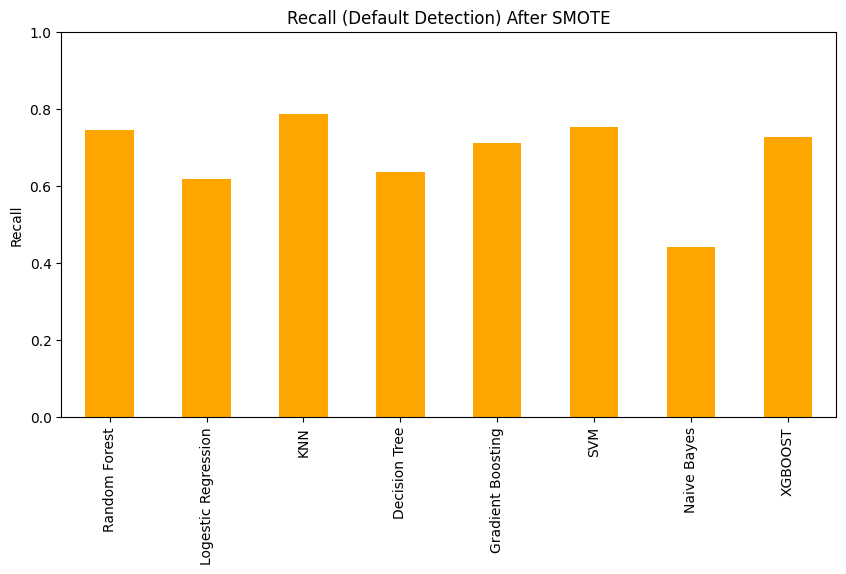

In [484]:
df_after["Recall"].plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Recall (Default Detection) After SMOTE")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.show()


### Voting classifier

In [493]:
X=df.drop('BAD',axis=1)
y=df['BAD']

In [494]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [387]:
best_models_smote=[
    ("logreg",log_grid_smote.best_estimator_),
    ("knn",knn_grid_smote.best_estimator_),
    ("svm",svm_grid_smote.best_estimator_),
    ("rf",rf_grid_smote.best_estimator_),
    ("xgb",xgb_grid_smote.best_estimator_),
    ("gb",gb_grid_smote.best_estimator_),
    ("dt",dt_grid_smote.best_estimator_),
    ("nb",nb_grid_smote.best_estimator_)
]


In [496]:
voting_clf_smote = VotingClassifier(best_models_smote, voting="soft")

pipe_voting_clf_smote = Pipeline([
    ("scaler",StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", voting_clf_smote)
])


scores = cross_val_score(pipe_voting_clf_smote, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)
print("Voting CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())
print("Std CV F1:", scores.std())


pipe_voting_clf_smote.fit(X_train, y_train)


y_pred = pipe_voting_clf_smote.predict(X_test)
y_proba = pipe_voting_clf_smote.predict_proba(X_test)[:, 1]

print("\n=== Voting Classifier (With SMOTE) ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Voting CV F1 scores: [0.8189415  0.85154062 0.81564246 0.83473389 0.83146067]
Mean CV F1: 0.8304638292480113
Std CV F1: 0.012774154507148857

=== Voting Classifier (With SMOTE) ===
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       954
           1       0.90      0.74      0.82       238

    accuracy                           0.93      1192
   macro avg       0.92      0.86      0.89      1192
weighted avg       0.93      0.93      0.93      1192

ROC-AUC: 0.9583795782463929


### Stacking classifier

In [504]:
stacking_clf_rf = StackingClassifier(
    estimators=best_models_smote,
    final_estimator=RandomForestClassifier(n_estimators=200,random_state=42),
    stack_method="predict_proba",
    cv=5,
    n_jobs=-1
)

pipe_stacking_clf_smote_rf = Pipeline([
    ("scaler",StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", stacking_clf_rf)
])

scores = cross_val_score(pipe_stacking_clf_smote_rf, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)
pipe_stacking_clf_smote_rf.fit(X_train,y_train)
y_pred=pipe_stacking_clf_smote_rf.predict(X_test)
y_proba=pipe_stacking_clf_smote_rf.predict_proba(X_test)[:,1]
print("=== Stacking Classifier (With SMOTE) ===")
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())
print("Std CV F1:", scores.std())

=== Stacking Classifier (With SMOTE) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.95      0.80      0.87       238

    accuracy                           0.95      1192
   macro avg       0.95      0.90      0.92      1192
weighted avg       0.95      0.95      0.95      1192

CV F1 scores: [0.82697947 0.87323944 0.85549133 0.84302326 0.85878963]
Mean CV F1: 0.8515046238828866
Std CV F1: 0.01558707044342319


In [505]:
stacking_clf_xgb = StackingClassifier(
    estimators=best_models_smote,
    final_estimator=XGBClassifier(n_estimators=300,max_depth=5,random_state=42),
    stack_method="predict_proba",
    cv=5,
    n_jobs=-1
)

pipe_stacking_clf_smote_xgb = Pipeline([
    ("scaler",StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", stacking_clf_xgb)
])

scores = cross_val_score(pipe_stacking_clf_smote_xgb, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)
pipe_stacking_clf_smote_xgb.fit(X_train,y_train)
y_pred=pipe_stacking_clf_smote_xgb.predict(X_test)
y_proba=pipe_stacking_clf_smote_xgb.predict_proba(X_test)[:,1]
print("=== Stacking Classifier (With SMOTE) ===")
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())
print("Std CV F1:", scores.std())

=== Stacking Classifier (With SMOTE) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.97      0.78      0.86       238

    accuracy                           0.95      1192
   macro avg       0.96      0.89      0.92      1192
weighted avg       0.95      0.95      0.95      1192

CV F1 scores: [0.84117647 0.88268156 0.84023669 0.83870968 0.86532951]
Mean CV F1: 0.8536267823075832
Std CV F1: 0.017538296413727984


In [497]:
stacking_clf = StackingClassifier(
    estimators=best_models_smote,
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    stack_method="predict_proba",
    cv=5,
    n_jobs=-1
)

pipe_stacking_clf_smote = Pipeline([
    ("scaler",StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", stacking_clf)
])

scores = cross_val_score(pipe_stacking_clf_smote, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)
pipe_stacking_clf_smote.fit(X_train,y_train)
y_pred=pipe_stacking_clf_smote.predict(X_test)
y_proba=pipe_stacking_clf_smote.predict_proba(X_test)[:,1]
print("=== Stacking Classifier (With SMOTE) ===")
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())
print("Std CV F1:", scores.std())


=== Stacking Classifier (With SMOTE) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.96      0.79      0.87       238

    accuracy                           0.95      1192
   macro avg       0.96      0.89      0.92      1192
weighted avg       0.95      0.95      0.95      1192

CV F1 scores: [0.82798834 0.87078652 0.86039886 0.86363636 0.85386819]
Mean CV F1: 0.8553356547847967
Std CV F1: 0.014719348631610316


# Saving the best model

In [511]:
joblib.dump(pipe_stacking_clf_smote_rf,"best_model.pkl")

['best_model.pkl']

In [512]:
feature_names=list(X.columns)
joblib.dump(feature_names, "feature_columns.pkl")


['feature_columns.pkl']

In [513]:
joblib.dump(X_train,"background_sample.pkl")

['background_sample.pkl']